In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# CT

In [2]:
mse_lin_l1 = float(np.loadtxt('CT_results/mse_lin_l1.csv', delimiter=',',skiprows=0))
mse_train_lin_l1 = float(np.loadtxt('CT_results/mse_train_lin_l1.csv', delimiter=',',skiprows=0))
mae_lin_l1 = float(np.loadtxt('CT_results/mae_lin_l1.csv', delimiter=',',skiprows=0))
mae_train_lin_l1 = float(np.loadtxt('CT_results/mae_train_lin_l1.csv', delimiter=',',skiprows=0))
time_lin_l1 = float(np.loadtxt('CT_results/time_lin_l1.csv', delimiter=',',skiprows=0))
mse_lin_l2 = float(np.loadtxt('CT_results/mse_lin_l2.csv', delimiter=',',skiprows=0))
mse_train_lin_l2 = float(np.loadtxt('CT_results/mse_train_lin_l2.csv', delimiter=',',skiprows=0))
mae_lin_l2 = float(np.loadtxt('CT_results/mae_lin_l2.csv', delimiter=',',skiprows=0))
mae_train_lin_l2 = float(np.loadtxt('CT_results/mae_train_lin_l2.csv', delimiter=',',skiprows=0))
time_lin_l2 = float(np.loadtxt('CT_results/time_lin_l2.csv', delimiter=',',skiprows=0))
mse_gauss = float(np.loadtxt('CT_results/mse_gauss.csv', delimiter=',',skiprows=0))
mse_train_gauss = float(np.loadtxt('CT_results/mse_train_gauss.csv', delimiter=',',skiprows=0))
mae_gauss = float(np.loadtxt('CT_results/mae_gauss.csv', delimiter=',',skiprows=0))
mae_train_gauss = float(np.loadtxt('CT_results/mae_train_gauss.csv', delimiter=',',skiprows=0))
time_gauss = float(np.loadtxt('CT_results/time_gauss.csv', delimiter=',',skiprows=0))

In [3]:
list_D = np.loadtxt('CT_results/list_D.csv', delimiter=',',skiprows=0)

In [4]:
mse_rff_l1 = np.loadtxt('CT_results/mse_rff_l1.csv', delimiter=',',skiprows=0)
mse_train_rff_l1 = np.loadtxt('CT_results/mse_train_rff_l1.csv', delimiter=',',skiprows=0)
mae_rff_l1 = np.loadtxt('CT_results/mae_rff_l1.csv', delimiter=',',skiprows=0)
mae_train_rff_l1 = np.loadtxt('CT_results/mae_train_rff_l1.csv', delimiter=',',skiprows=0)
times_rff_l1 = np.loadtxt('CT_results/times_rff_l1.csv', delimiter=',',skiprows=0)
mse_rff_l2 = np.loadtxt('CT_results/mse_rff_l2.csv', delimiter=',',skiprows=0)
mse_train_rff_l2 = np.loadtxt('CT_results/mse_train_rff_l2.csv', delimiter=',',skiprows=0)
mae_rff_l2 = np.loadtxt('CT_results/mae_rff_l2.csv', delimiter=',',skiprows=0)
mae_train_rff_l2 = np.loadtxt('CT_results/mae_train_rff_l2.csv', delimiter=',',skiprows=0)
times_rff_l2 = np.loadtxt('CT_results/times_rff_l2.csv', delimiter=',',skiprows=0)

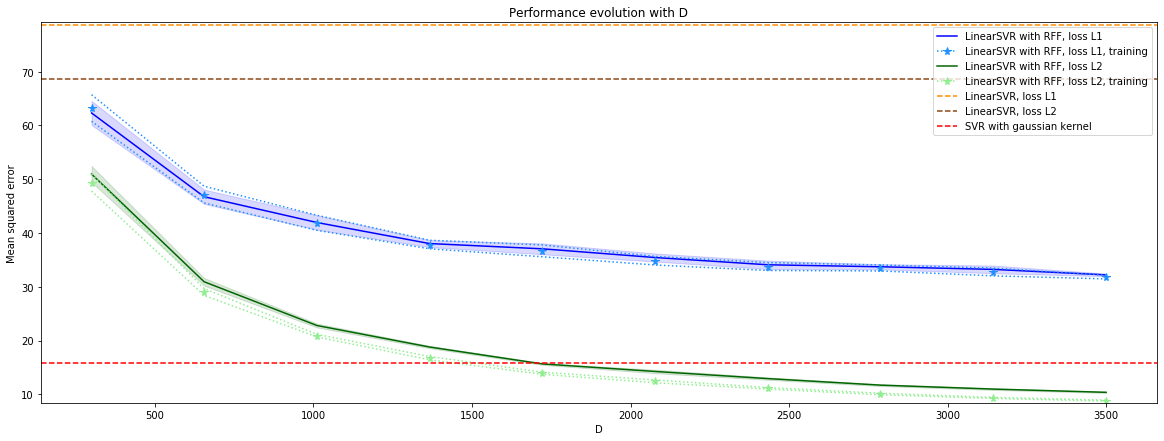

In [5]:
fig = plt.figure(figsize=(20,7))
ax = plt.subplot(1,1,1)
# ax.plot of the performance

y_max = max(max(np.mean(mse_rff_l1, axis=1) + np.std(mse_rff_l1, axis=1)),
            max(np.mean(mse_train_rff_l1, axis=1) + np.std(mse_train_rff_l1, axis=1)),
            max(np.mean(mse_rff_l2, axis=1) + np.std(mse_rff_l2, axis=1)),
            max(np.mean(mse_train_rff_l2, axis=1) + np.std(mse_train_rff_l2, axis=1)),
            mse_lin_l1, mse_lin_l2, mse_gauss)+0.5
y_min = min(min(np.mean(mse_rff_l1, axis=1) + np.std(mse_rff_l1, axis=1)),
            min(np.mean(mse_train_rff_l1, axis=1) + np.std(mse_train_rff_l1, axis=1)),
            min(np.mean(mse_rff_l2, axis=1) + np.std(mse_rff_l2, axis=1)),
            min(np.mean(mse_train_rff_l2, axis=1) + np.std(mse_train_rff_l2, axis=1)),
            mse_lin_l1, mse_lin_l2, mse_gauss)-0.5

ax.set_ylim(y_min, y_max)

ax.plot(list_D, np.mean(mse_rff_l1, axis=1), '-', color='blue', label='LinearSVR with RFF, loss L1')
ax.fill_between(list_D, np.mean(mse_rff_l1, axis=1) - np.std(mse_rff_l1, axis=1),
             np.mean(mse_rff_l1, axis=1) + np.std(mse_rff_l1, axis=1), 
             color='blue', alpha=0.15)

ax.plot(list_D, np.mean(mse_train_rff_l1, axis=1), '*', markersize=8, color='dodgerblue',label='LinearSVR with RFF, loss L1, training')
ax.plot(list_D, np.mean(mse_train_rff_l1, axis=1) - np.std(mse_train_rff_l1, axis=1), ':',color='dodgerblue')
ax.plot(list_D, np.mean(mse_train_rff_l1, axis=1) + np.std(mse_train_rff_l1, axis=1), ':',color='dodgerblue')

ax.plot(list_D, np.mean(mse_rff_l2, axis=1), '-', color='darkgreen', label='LinearSVR with RFF, loss L2')
ax.fill_between(list_D, np.mean(mse_rff_l2, axis=1) - np.std(mse_rff_l2, axis=1),
             np.mean(mse_rff_l2, axis=1) + np.std(mse_rff_l2, axis=1), 
             color='darkgreen', alpha=0.15)

ax.plot(list_D, np.mean(mse_train_rff_l2, axis=1), '*', markersize=8, color='lightgreen',label='LinearSVR with RFF, loss L2, training')
ax.plot(list_D, np.mean(mse_train_rff_l2, axis=1) - np.std(mse_train_rff_l2, axis=1), ':',color='lightgreen')
ax.plot(list_D, np.mean(mse_train_rff_l2, axis=1) + np.std(mse_train_rff_l2, axis=1), ':',color='lightgreen')


ax.axhline(y=mse_lin_l1, color='darkorange', linestyle='--', label='LinearSVR, loss L1 ')
ax.axhline(y=mse_lin_l2, color='saddlebrown', linestyle='--', label='LinearSVR, loss L2')
ax.axhline(y=mse_gauss, color='r', linestyle='--', label='SVR with gaussian kernel')

ax.set_title("Performance evolution with D")
ax.set_xlabel("D")
ax.set_ylabel("Mean squared error")

handles, labels = ax.get_legend_handles_labels()
handles = [copy.copy(ha) for ha in handles ]
handles[1].set_linestyle(':')
handles[3].set_linestyle(':')
ax.legend(loc='upper right', handles=handles, labels=labels)

plt.savefig("CT_results/plots/D_mse_rff.png")
plt.show()

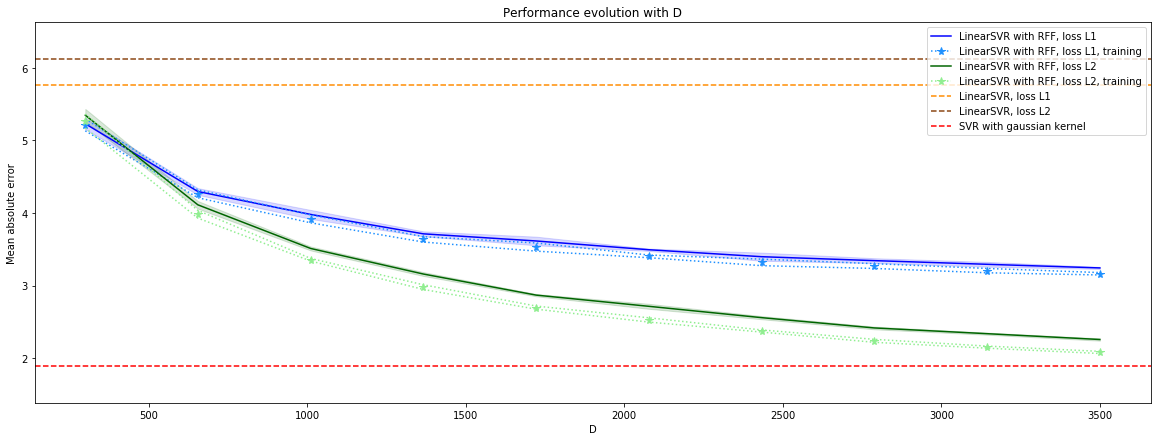

In [6]:
fig = plt.figure(figsize=(20,7))
ax = plt.subplot(1,1,1)

# ax.plot of the performance

y_max = max(max(np.mean(mae_rff_l1, axis=1) + np.std(mae_rff_l1, axis=1)),
            max(np.mean(mae_train_rff_l1, axis=1) + np.std(mae_train_rff_l1, axis=1)),
            max(np.mean(mae_rff_l2, axis=1) + np.std(mae_rff_l2, axis=1)),
            max(np.mean(mae_train_rff_l2, axis=1) + np.std(mae_train_rff_l2, axis=1)),
            mae_lin_l1, mae_lin_l2, mae_gauss)+0.5
y_min = min(min(np.mean(mae_rff_l1, axis=1) + np.std(mae_rff_l1, axis=1)),
            min(np.mean(mae_train_rff_l1, axis=1) + np.std(mae_train_rff_l1, axis=1)),
            min(np.mean(mae_rff_l2, axis=1) + np.std(mae_rff_l2, axis=1)),
            min(np.mean(mae_train_rff_l2, axis=1) + np.std(mae_train_rff_l2, axis=1)),
            mae_lin_l1, mae_lin_l2, mae_gauss)-0.5

ax.set_ylim(y_min, y_max)

ax.plot(list_D, np.mean(mae_rff_l1, axis=1), '-', color='blue', label='LinearSVR with RFF, loss L1')
ax.fill_between(list_D, np.mean(mae_rff_l1, axis=1) - np.std(mae_rff_l1, axis=1),
             np.mean(mae_rff_l1, axis=1) + np.std(mae_rff_l1, axis=1), 
             color='blue', alpha=0.15)

ax.plot(list_D, np.mean(mae_train_rff_l1, axis=1), '*', markersize=8, color='dodgerblue',label='LinearSVR with RFF, loss L1, training')
ax.plot(list_D, np.mean(mae_train_rff_l1, axis=1) - np.std(mae_train_rff_l1, axis=1), ':',color='dodgerblue')
ax.plot(list_D, np.mean(mae_train_rff_l1, axis=1) + np.std(mae_train_rff_l1, axis=1), ':',color='dodgerblue')

ax.plot(list_D, np.mean(mae_rff_l2, axis=1), '-', color='darkgreen', label='LinearSVR with RFF, loss L2')
ax.fill_between(list_D, np.mean(mae_rff_l2, axis=1) - np.std(mae_rff_l2, axis=1),
             np.mean(mae_rff_l2, axis=1) + np.std(mae_rff_l2, axis=1), 
             color='darkgreen', alpha=0.15)

ax.plot(list_D, np.mean(mae_train_rff_l2, axis=1), '*', markersize=8, color='lightgreen',label='LinearSVR with RFF, loss L2, training')
ax.plot(list_D, np.mean(mae_train_rff_l2, axis=1) - np.std(mae_train_rff_l2, axis=1), ':',color='lightgreen')
ax.plot(list_D, np.mean(mae_train_rff_l2, axis=1) + np.std(mae_train_rff_l2, axis=1), ':',color='lightgreen')


ax.axhline(y=mae_lin_l1, color='darkorange', linestyle='--', label='LinearSVR, loss L1 ')
ax.axhline(y=mae_lin_l2, color='saddlebrown', linestyle='--', label='LinearSVR, loss L2')
ax.axhline(y=mae_gauss, color='r', linestyle='--', label='SVR with gaussian kernel')

ax.set_title("Performance evolution with D")
ax.set_xlabel("D")
ax.set_ylabel("Mean absolute error")

handles, labels = ax.get_legend_handles_labels()
handles = [copy.copy(ha) for ha in handles ]
handles[1].set_linestyle(':')
handles[3].set_linestyle(':')
ax.legend(loc='upper right', handles=handles, labels=labels)

plt.savefig("CT_results/plots/D_mae_rff.png")
plt.show()

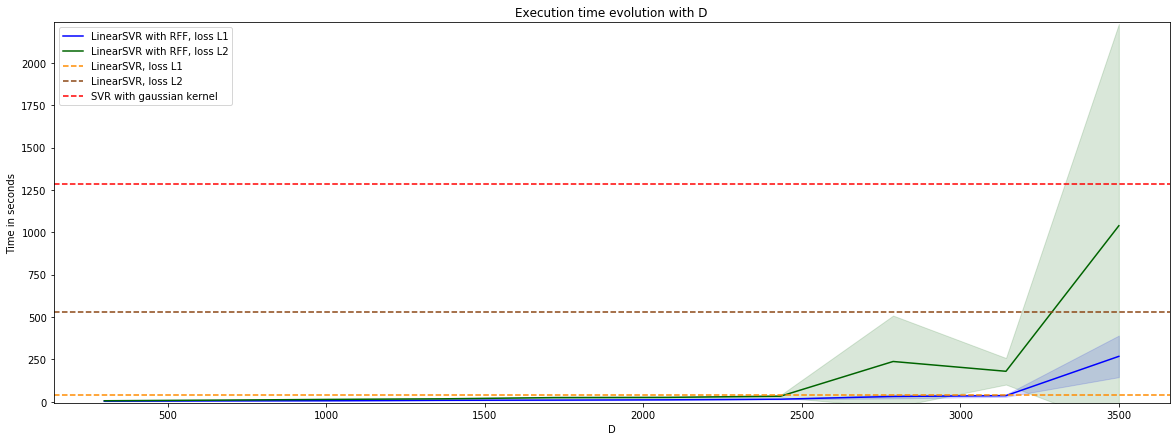

In [7]:
fig = plt.figure(figsize=(20,7)) 
ax = plt.subplot(1,1,1)

# plot of the performance

y_max = max(max(np.mean(times_rff_l1, axis=1) + np.std(times_rff_l1, axis=1)),
            max(np.mean(times_rff_l2, axis=1) + np.std(times_rff_l2, axis=1)),
            time_lin_l1, time_lin_l2, time_gauss)+10
y_min = min(min(np.mean(times_rff_l1, axis=1) + np.std(times_rff_l1, axis=1)),
            min(np.mean(times_rff_l2, axis=1) + np.std(times_rff_l2, axis=1)),
            time_lin_l1, time_lin_l2, time_gauss)-10

ax.set_ylim(y_min, y_max)

ax.plot(list_D, np.mean(times_rff_l1, axis=1), '-', color='blue', label='LinearSVR with RFF, loss L1')
ax.fill_between(list_D, np.mean(times_rff_l1, axis=1) - np.std(times_rff_l1, axis=1),
             np.mean(times_rff_l1, axis=1) + np.std(times_rff_l1, axis=1), 
             color='blue', alpha=0.15)

ax.plot(list_D, np.mean(times_rff_l2, axis=1), '-', color='darkgreen', label='LinearSVR with RFF, loss L2')
ax.fill_between(list_D, np.mean(times_rff_l2, axis=1) - np.std(times_rff_l2, axis=1),
             np.mean(times_rff_l2, axis=1) + np.std(times_rff_l2, axis=1), 
             color='darkgreen', alpha=0.15)

ax.axhline(y=time_lin_l1, color='darkorange', linestyle='--', label='LinearSVR, loss L1 ')
ax.axhline(y=time_lin_l2, color='saddlebrown', linestyle='--', label='LinearSVR, loss L2')
ax.axhline(y=time_gauss, color='r', linestyle='--', label='SVR with gaussian kernel')

ax.set_title("Execution time evolution with D")
ax.set_xlabel("D")
ax.set_ylabel("Time in seconds")

ax.legend(loc='upper left')

plt.savefig("CT_results/plots/D_time_rff.png")
plt.show()

In [8]:
mse_nys_plain = np.loadtxt('CT_results/mse_nys_plain.csv', delimiter=',',skiprows=0)
mse_train_nys_plain = np.loadtxt('CT_results/mse_train_nys_plain.csv', delimiter=',',skiprows=0)
mae_nys_plain = np.loadtxt('CT_results/mae_nys_plain.csv', delimiter=',',skiprows=0)
mae_train_nys_plain = np.loadtxt('CT_results/mae_train_nys_plain.csv', delimiter=',',skiprows=0)
times_nys_plain = np.loadtxt('CT_results/times_nys_plain.csv', delimiter=',',skiprows=0)
mse_nys_l2 = np.loadtxt('CT_results/mse_nys_l2.csv', delimiter=',',skiprows=0)
mse_train_nys_l2 = np.loadtxt('CT_results/mse_train_nys_l2.csv', delimiter=',',skiprows=0)
mae_nys_l2 = np.loadtxt('CT_results/mae_nys_l2.csv', delimiter=',',skiprows=0)
mae_train_nys_l2 = np.loadtxt('CT_results/mae_train_nys_l2.csv', delimiter=',',skiprows=0)
times_nys_l2 = np.loadtxt('CT_results/times_nys_l2.csv', delimiter=',',skiprows=0)
mse_nys_l1 = np.loadtxt('CT_results/mse_nys_l1.csv', delimiter=',',skiprows=0)
mse_train_nys_l1 = np.loadtxt('CT_results/mse_train_nys_l1.csv', delimiter=',',skiprows=0)
mae_nys_l1 = np.loadtxt('CT_results/mae_nys_l1.csv', delimiter=',',skiprows=0)
mae_train_nys_l1 = np.loadtxt('CT_results/mae_train_nys_l1.csv', delimiter=',',skiprows=0)
times_nys_l1 = np.loadtxt('CT_results/times_nys_l1.csv', delimiter=',',skiprows=0)
mse_falkon = np.loadtxt('CT_results/mse_falkon.csv', delimiter=',',skiprows=0)
mse_train_falkon = np.loadtxt('CT_results/mse_train_falkon.csv', delimiter=',',skiprows=0)
mae_falkon = np.loadtxt('CT_results/mae_falkon.csv', delimiter=',',skiprows=0)
mae_train_falkon = np.loadtxt('CT_results/mae_train_falkon.csv', delimiter=',',skiprows=0)
times_falkon = np.loadtxt('CT_results/times_falkon.csv', delimiter=',',skiprows=0)

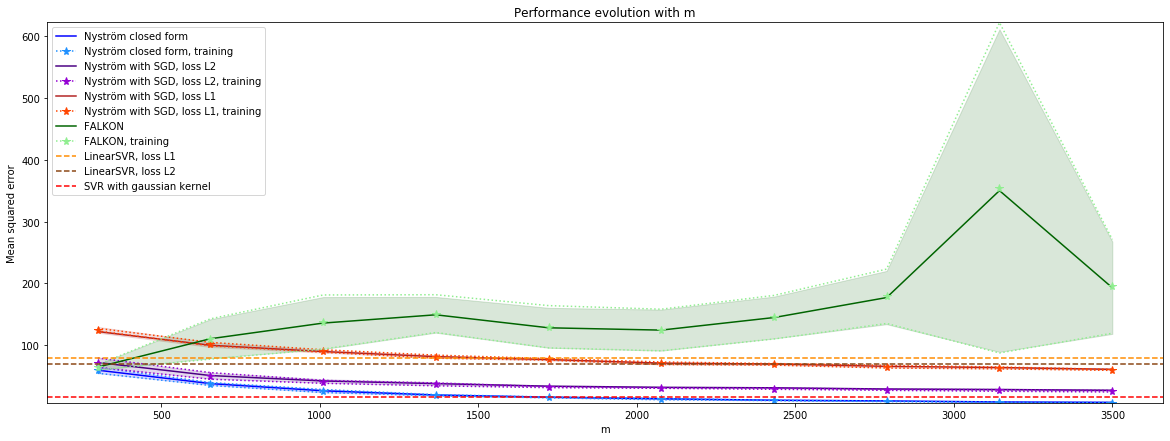

In [9]:
fig = plt.figure(figsize=(20,7)) 
ax = plt.subplot(1,1,1)

# ax.plot of the performance

y_max = max(max(np.mean(mse_nys_plain, axis=1) + np.std(mse_nys_plain, axis=1)),
            max(np.mean(mse_train_nys_plain, axis=1) + np.std(mse_train_nys_plain, axis=1)),
            max(np.mean(mse_nys_l2, axis=1) + np.std(mse_nys_l2, axis=1)),
            max(np.mean(mse_train_nys_l2, axis=1) + np.std(mse_train_nys_l2, axis=1)),
            max(np.mean(mse_nys_l1, axis=1) + np.std(mse_nys_l1, axis=1)),
            max(np.mean(mse_train_nys_l1, axis=1) + np.std(mse_train_nys_l1, axis=1)),
            max(np.mean(mse_falkon, axis=1) + np.std(mse_falkon, axis=1)),
            max(np.mean(mse_train_falkon, axis=1) + np.std(mse_train_falkon, axis=1)),
            mse_lin_l1, mse_lin_l2, mse_gauss)+0.5
y_min = min(min(np.mean(mse_nys_plain, axis=1) + np.std(mse_nys_plain, axis=1)),
            min(np.mean(mse_train_nys_plain, axis=1) + np.std(mse_train_nys_plain, axis=1)),
            min(np.mean(mse_nys_l2, axis=1) + np.std(mse_nys_l2, axis=1)),
            min(np.mean(mse_train_nys_l2, axis=1) + np.std(mse_train_nys_l2, axis=1)),
            min(np.mean(mse_nys_l1, axis=1) + np.std(mse_nys_l1, axis=1)),
            min(np.mean(mse_train_nys_l1, axis=1) + np.std(mse_train_nys_l1, axis=1)),
            min(np.mean(mse_falkon, axis=1) + np.std(mse_falkon, axis=1)),
            min(np.mean(mse_train_falkon, axis=1) + np.std(mse_train_falkon, axis=1)),
            mse_lin_l1, mse_lin_l2, mse_gauss)-0.5

ax.set_ylim(y_min, y_max)

ax.plot(list_D, np.mean(mse_nys_plain, axis=1), '-', color='blue', label='Nyström closed form')
ax.fill_between(list_D, np.mean(mse_nys_plain, axis=1) - np.std(mse_nys_plain, axis=1),
             np.mean(mse_nys_plain, axis=1) + np.std(mse_nys_plain, axis=1), 
             color='blue', alpha=0.15)

ax.plot(list_D, np.mean(mse_train_nys_plain, axis=1), '*', markersize=8, color='dodgerblue',label='Nyström closed form, training')
ax.plot(list_D, np.mean(mse_train_nys_plain, axis=1) - np.std(mse_train_nys_plain, axis=1), ':',color='dodgerblue')
ax.plot(list_D, np.mean(mse_train_nys_plain, axis=1) + np.std(mse_train_nys_plain, axis=1), ':',color='dodgerblue')

ax.plot(list_D, np.mean(mse_nys_l2, axis=1), '-', color='indigo', label='Nyström with SGD, loss L2')
ax.fill_between(list_D, np.mean(mse_nys_l2, axis=1) - np.std(mse_nys_l2, axis=1),
             np.mean(mse_nys_l2, axis=1) + np.std(mse_nys_l2, axis=1), 
             color='indigo', alpha=0.15)

ax.plot(list_D, np.mean(mse_train_nys_l2, axis=1), '*', markersize=8, color='darkviolet',label='Nyström with SGD, loss L2, training')
ax.plot(list_D, np.mean(mse_train_nys_l2, axis=1) - np.std(mse_train_nys_l2, axis=1), ':',color='darkviolet')
ax.plot(list_D, np.mean(mse_train_nys_l2, axis=1) + np.std(mse_train_nys_l2, axis=1), ':',color='darkviolet')

ax.plot(list_D, np.mean(mse_nys_l1, axis=1), '-', color='firebrick', label='Nyström with SGD, loss L1')
ax.fill_between(list_D, np.mean(mse_nys_l1, axis=1) - np.std(mse_nys_l1, axis=1),
             np.mean(mse_nys_l1, axis=1) + np.std(mse_nys_l2, axis=1), 
             color='firebrick', alpha=0.15)

ax.plot(list_D, np.mean(mse_train_nys_l1, axis=1), '*', markersize=8, color='orangered',label='Nyström with SGD, loss L1, training')
ax.plot(list_D, np.mean(mse_train_nys_l1, axis=1) - np.std(mse_train_nys_l1, axis=1), ':',color='orangered')
ax.plot(list_D, np.mean(mse_train_nys_l1, axis=1) + np.std(mse_train_nys_l1, axis=1), ':',color='orangered')

ax.plot(list_D, np.mean(mse_falkon, axis=1), '-', color='darkgreen', label='FALKON')
ax.fill_between(list_D, np.mean(mse_falkon, axis=1) - np.std(mse_falkon, axis=1),
             np.mean(mse_falkon, axis=1) + np.std(mse_falkon, axis=1), 
             color='darkgreen', alpha=0.15)

ax.plot(list_D, np.mean(mse_train_falkon, axis=1), '*', markersize=8, color='lightgreen',label='FALKON, training')
ax.plot(list_D, np.mean(mse_train_falkon, axis=1) - np.std(mse_train_falkon, axis=1), ':',color='lightgreen')
ax.plot(list_D, np.mean(mse_train_falkon, axis=1) + np.std(mse_train_falkon, axis=1), ':',color='lightgreen')

ax.axhline(y=mse_lin_l1, color='darkorange', linestyle='--', label='LinearSVR, loss L1 ')
ax.axhline(y=mse_lin_l2, color='saddlebrown', linestyle='--', label='LinearSVR, loss L2')
ax.axhline(y=mse_gauss, color='r', linestyle='--', label='SVR with gaussian kernel')

ax.set_title("Performance evolution with m")
ax.set_xlabel("m")
ax.set_ylabel("Mean squared error")

handles, labels = ax.get_legend_handles_labels()
handles = [copy.copy(ha) for ha in handles ]
handles[1].set_linestyle(':')
handles[3].set_linestyle(':')
handles[5].set_linestyle(':')
handles[7].set_linestyle(':')
ax.legend(loc='upper left', handles=handles, labels=labels)

plt.savefig("CT_results/plots/m_mse_nys_falkon.png")
plt.show()

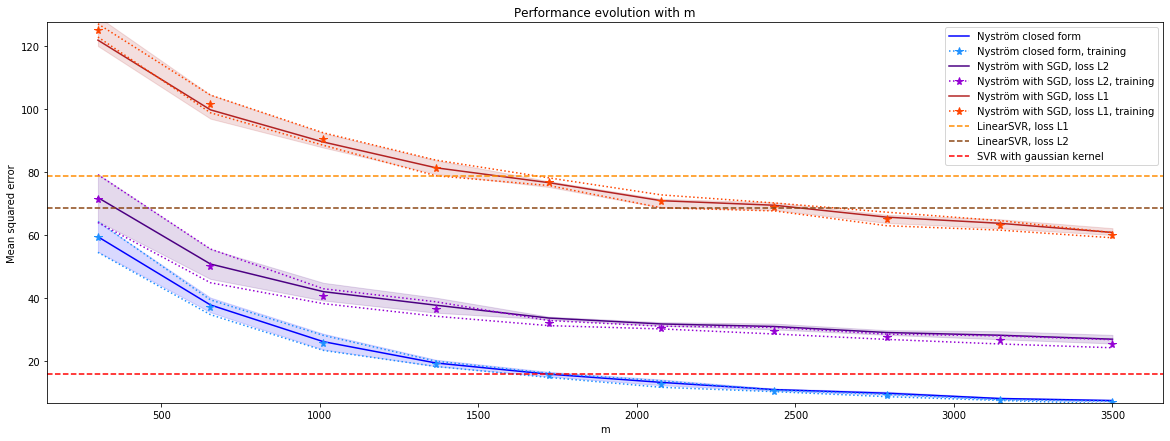

In [10]:
fig = plt.figure(figsize=(20,7)) 
ax = plt.subplot(1,1,1)

# ax.plot of the performance

y_max = max(max(np.mean(mse_nys_plain, axis=1) + np.std(mse_nys_plain, axis=1)),
            max(np.mean(mse_train_nys_plain, axis=1) + np.std(mse_train_nys_plain, axis=1)),
            max(np.mean(mse_nys_l2, axis=1) + np.std(mse_nys_l2, axis=1)),
            max(np.mean(mse_train_nys_l2, axis=1) + np.std(mse_train_nys_l2, axis=1)),
            max(np.mean(mse_nys_l1, axis=1) + np.std(mse_nys_l1, axis=1)),
            max(np.mean(mse_train_nys_l1, axis=1) + np.std(mse_train_nys_l1, axis=1)),
            mse_lin_l1, mse_lin_l2, mse_gauss)+0.5
y_min = min(min(np.mean(mse_nys_plain, axis=1) + np.std(mse_nys_plain, axis=1)),
            min(np.mean(mse_train_nys_plain, axis=1) + np.std(mse_train_nys_plain, axis=1)),
            min(np.mean(mse_nys_l2, axis=1) + np.std(mse_nys_l2, axis=1)),
            min(np.mean(mse_train_nys_l2, axis=1) + np.std(mse_train_nys_l2, axis=1)),
            min(np.mean(mse_nys_l1, axis=1) + np.std(mse_nys_l1, axis=1)),
            min(np.mean(mse_train_nys_l1, axis=1) + np.std(mse_train_nys_l1, axis=1)),
            mse_lin_l1, mse_lin_l2, mse_gauss)-0.5

ax.set_ylim(y_min, y_max)

ax.plot(list_D, np.mean(mse_nys_plain, axis=1), '-', color='blue', label='Nyström closed form')
ax.fill_between(list_D, np.mean(mse_nys_plain, axis=1) - np.std(mse_nys_plain, axis=1),
             np.mean(mse_nys_plain, axis=1) + np.std(mse_nys_plain, axis=1), 
             color='blue', alpha=0.15)

ax.plot(list_D, np.mean(mse_train_nys_plain, axis=1), '*', markersize=8, color='dodgerblue',label='Nyström closed form, training')
ax.plot(list_D, np.mean(mse_train_nys_plain, axis=1) - np.std(mse_train_nys_plain, axis=1), ':',color='dodgerblue')
ax.plot(list_D, np.mean(mse_train_nys_plain, axis=1) + np.std(mse_train_nys_plain, axis=1), ':',color='dodgerblue')

ax.plot(list_D, np.mean(mse_nys_l2, axis=1), '-', color='indigo', label='Nyström with SGD, loss L2')
ax.fill_between(list_D, np.mean(mse_nys_l2, axis=1) - np.std(mse_nys_l2, axis=1),
             np.mean(mse_nys_l2, axis=1) + np.std(mse_nys_l2, axis=1), 
             color='indigo', alpha=0.15)

ax.plot(list_D, np.mean(mse_train_nys_l2, axis=1), '*', markersize=8, color='darkviolet',label='Nyström with SGD, loss L2, training')
ax.plot(list_D, np.mean(mse_train_nys_l2, axis=1) - np.std(mse_train_nys_l2, axis=1), ':',color='darkviolet')
ax.plot(list_D, np.mean(mse_train_nys_l2, axis=1) + np.std(mse_train_nys_l2, axis=1), ':',color='darkviolet')

ax.plot(list_D, np.mean(mse_nys_l1, axis=1), '-', color='firebrick', label='Nyström with SGD, loss L1')
ax.fill_between(list_D, np.mean(mse_nys_l1, axis=1) - np.std(mse_nys_l1, axis=1),
             np.mean(mse_nys_l1, axis=1) + np.std(mse_nys_l2, axis=1), 
             color='firebrick', alpha=0.15)

ax.plot(list_D, np.mean(mse_train_nys_l1, axis=1), '*', markersize=8, color='orangered',label='Nyström with SGD, loss L1, training')
ax.plot(list_D, np.mean(mse_train_nys_l1, axis=1) - np.std(mse_train_nys_l1, axis=1), ':',color='orangered')
ax.plot(list_D, np.mean(mse_train_nys_l1, axis=1) + np.std(mse_train_nys_l1, axis=1), ':',color='orangered')

ax.axhline(y=mse_lin_l1, color='darkorange', linestyle='--', label='LinearSVR, loss L1 ')
ax.axhline(y=mse_lin_l2, color='saddlebrown', linestyle='--', label='LinearSVR, loss L2')
ax.axhline(y=mse_gauss, color='r', linestyle='--', label='SVR with gaussian kernel')

ax.set_title("Performance evolution with m")
ax.set_xlabel("m")
ax.set_ylabel("Mean squared error")

handles, labels = ax.get_legend_handles_labels()
handles = [copy.copy(ha) for ha in handles ]
handles[1].set_linestyle(':')
handles[3].set_linestyle(':')
handles[5].set_linestyle(':')
ax.legend(loc='upper right', handles=handles, labels=labels)

plt.savefig("CT_results/plots/m_mse_nys.png")
plt.show()

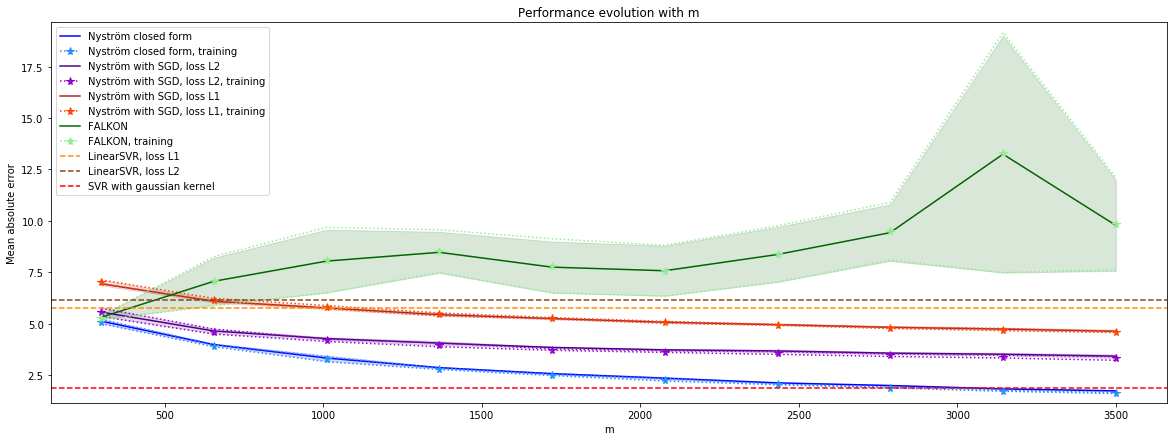

In [11]:
fig = plt.figure(figsize=(20,7)) 
ax = plt.subplot(1,1,1)

# ax.plot of the performance

y_max = max(max(np.mean(mae_nys_plain, axis=1) + np.std(mae_nys_plain, axis=1)),
            max(np.mean(mae_train_nys_plain, axis=1) + np.std(mae_train_nys_plain, axis=1)),
            max(np.mean(mae_nys_l2, axis=1) + np.std(mae_nys_l2, axis=1)),
            max(np.mean(mae_train_nys_l2, axis=1) + np.std(mae_train_nys_l2, axis=1)),
            max(np.mean(mae_nys_l1, axis=1) + np.std(mae_nys_l1, axis=1)),
            max(np.mean(mae_train_nys_l1, axis=1) + np.std(mae_train_nys_l1, axis=1)),
            max(np.mean(mae_falkon, axis=1) + np.std(mae_falkon, axis=1)),
            max(np.mean(mae_train_falkon, axis=1) + np.std(mae_train_falkon, axis=1)),
            mae_lin_l1, mae_lin_l2, mae_gauss)+0.5
y_min = min(min(np.mean(mae_nys_plain, axis=1) + np.std(mae_nys_plain, axis=1)),
            min(np.mean(mae_train_nys_plain, axis=1) + np.std(mae_train_nys_plain, axis=1)),
            min(np.mean(mae_nys_l2, axis=1) + np.std(mae_nys_l2, axis=1)),
            min(np.mean(mae_train_nys_l2, axis=1) + np.std(mae_train_nys_l2, axis=1)),
            min(np.mean(mae_nys_l1, axis=1) + np.std(mae_nys_l1, axis=1)),
            min(np.mean(mae_train_nys_l1, axis=1) + np.std(mae_train_nys_l1, axis=1)),
            min(np.mean(mae_falkon, axis=1) + np.std(mae_falkon, axis=1)),
            min(np.mean(mae_train_falkon, axis=1) + np.std(mae_train_falkon, axis=1)),
            mae_lin_l1, mae_lin_l2, mae_gauss)-0.5

ax.set_ylim(y_min, y_max)

ax.plot(list_D, np.mean(mae_nys_plain, axis=1), '-', color='blue', label='Nyström closed form')
ax.fill_between(list_D, np.mean(mae_nys_plain, axis=1) - np.std(mae_nys_plain, axis=1),
             np.mean(mae_nys_plain, axis=1) + np.std(mae_nys_plain, axis=1), 
             color='blue', alpha=0.15)

ax.plot(list_D, np.mean(mae_train_nys_plain, axis=1), '*', markersize=8, color='dodgerblue',label='Nyström closed form, training')
ax.plot(list_D, np.mean(mae_train_nys_plain, axis=1) - np.std(mae_train_nys_plain, axis=1), ':',color='dodgerblue')
ax.plot(list_D, np.mean(mae_train_nys_plain, axis=1) + np.std(mae_train_nys_plain, axis=1), ':',color='dodgerblue')

ax.plot(list_D, np.mean(mae_nys_l2, axis=1), '-', color='indigo', label='Nyström with SGD, loss L2')
ax.fill_between(list_D, np.mean(mae_nys_l2, axis=1) - np.std(mae_nys_l2, axis=1),
             np.mean(mae_nys_l2, axis=1) + np.std(mae_nys_l2, axis=1), 
             color='indigo', alpha=0.15)

ax.plot(list_D, np.mean(mae_train_nys_l2, axis=1), '*', markersize=8, color='darkviolet',label='Nyström with SGD, loss L2, training')
ax.plot(list_D, np.mean(mae_train_nys_l2, axis=1) - np.std(mae_train_nys_l2, axis=1), ':',color='darkviolet')
ax.plot(list_D, np.mean(mae_train_nys_l2, axis=1) + np.std(mae_train_nys_l2, axis=1), ':',color='darkviolet')

ax.plot(list_D, np.mean(mae_nys_l1, axis=1), '-', color='firebrick', label='Nyström with SGD, loss L1')
ax.fill_between(list_D, np.mean(mae_nys_l1, axis=1) - np.std(mae_nys_l1, axis=1),
             np.mean(mae_nys_l1, axis=1) + np.std(mae_nys_l2, axis=1), 
             color='firebrick', alpha=0.15)

ax.plot(list_D, np.mean(mae_train_nys_l1, axis=1), '*', markersize=8, color='orangered',label='Nyström with SGD, loss L1, training')
ax.plot(list_D, np.mean(mae_train_nys_l1, axis=1) - np.std(mae_train_nys_l1, axis=1), ':',color='orangered')
ax.plot(list_D, np.mean(mae_train_nys_l1, axis=1) + np.std(mae_train_nys_l1, axis=1), ':',color='orangered')

ax.plot(list_D, np.mean(mae_falkon, axis=1), '-', color='darkgreen', label='FALKON')
ax.fill_between(list_D, np.mean(mae_falkon, axis=1) - np.std(mae_falkon, axis=1),
             np.mean(mae_falkon, axis=1) + np.std(mae_falkon, axis=1), 
             color='darkgreen', alpha=0.15)

ax.plot(list_D, np.mean(mae_train_falkon, axis=1), '*', markersize=8, color='lightgreen',label='FALKON, training')
ax.plot(list_D, np.mean(mae_train_falkon, axis=1) - np.std(mae_train_falkon, axis=1), ':',color='lightgreen')
ax.plot(list_D, np.mean(mae_train_falkon, axis=1) + np.std(mae_train_falkon, axis=1), ':',color='lightgreen')


ax.axhline(y=mae_lin_l1, color='darkorange', linestyle='--', label='LinearSVR, loss L1 ')
ax.axhline(y=mae_lin_l2, color='saddlebrown', linestyle='--', label='LinearSVR, loss L2')
ax.axhline(y=mae_gauss, color='r', linestyle='--', label='SVR with gaussian kernel')

ax.set_title("Performance evolution with m")
ax.set_xlabel("m")
ax.set_ylabel("Mean absolute error")

handles, labels = ax.get_legend_handles_labels()
handles = [copy.copy(ha) for ha in handles ]
handles[1].set_linestyle(':')
handles[3].set_linestyle(':')
handles[5].set_linestyle(':')
handles[7].set_linestyle(':')
ax.legend(loc='upper left', handles=handles, labels=labels)

plt.savefig("CT_results/plots/m_mae_nys_falkon.png")
plt.show()

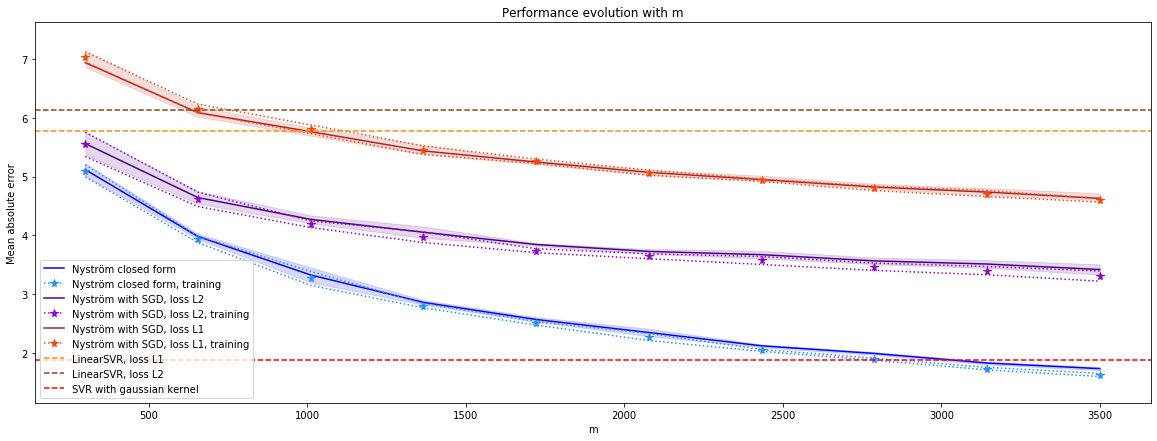

In [12]:
fig = plt.figure(figsize=(20,7)) 
ax = plt.subplot(1,1,1)

# ax.plot of the performance

y_max = max(max(np.mean(mae_nys_plain, axis=1) + np.std(mae_nys_plain, axis=1)),
            max(np.mean(mae_train_nys_plain, axis=1) + np.std(mae_train_nys_plain, axis=1)),
            max(np.mean(mae_nys_l2, axis=1) + np.std(mae_nys_l2, axis=1)),
            max(np.mean(mae_train_nys_l2, axis=1) + np.std(mae_train_nys_l2, axis=1)),
            max(np.mean(mae_nys_l1, axis=1) + np.std(mae_nys_l1, axis=1)),
            max(np.mean(mae_train_nys_l1, axis=1) + np.std(mae_train_nys_l1, axis=1)),
            mae_lin_l1, mae_lin_l2, mae_gauss)+0.5
y_min = min(min(np.mean(mae_nys_plain, axis=1) + np.std(mae_nys_plain, axis=1)),
            min(np.mean(mae_train_nys_plain, axis=1) + np.std(mae_train_nys_plain, axis=1)),
            min(np.mean(mae_nys_l2, axis=1) + np.std(mae_nys_l2, axis=1)),
            min(np.mean(mae_train_nys_l2, axis=1) + np.std(mae_train_nys_l2, axis=1)),
            min(np.mean(mae_nys_l1, axis=1) + np.std(mae_nys_l1, axis=1)),
            min(np.mean(mae_train_nys_l1, axis=1) + np.std(mae_train_nys_l1, axis=1)),
            mae_lin_l1, mae_lin_l2, mae_gauss)-0.5

ax.set_ylim(y_min, y_max)

ax.plot(list_D, np.mean(mae_nys_plain, axis=1), '-', color='blue', label='Nyström closed form')
ax.fill_between(list_D, np.mean(mae_nys_plain, axis=1) - np.std(mae_nys_plain, axis=1),
             np.mean(mae_nys_plain, axis=1) + np.std(mae_nys_plain, axis=1), 
             color='blue', alpha=0.15)

ax.plot(list_D, np.mean(mae_train_nys_plain, axis=1), '*', markersize=8, color='dodgerblue',label='Nyström closed form, training')
ax.plot(list_D, np.mean(mae_train_nys_plain, axis=1) - np.std(mae_train_nys_plain, axis=1), ':',color='dodgerblue')
ax.plot(list_D, np.mean(mae_train_nys_plain, axis=1) + np.std(mae_train_nys_plain, axis=1), ':',color='dodgerblue')

ax.plot(list_D, np.mean(mae_nys_l2, axis=1), '-', color='indigo', label='Nyström with SGD, loss L2')
ax.fill_between(list_D, np.mean(mae_nys_l2, axis=1) - np.std(mae_nys_l2, axis=1),
             np.mean(mae_nys_l2, axis=1) + np.std(mae_nys_l2, axis=1), 
             color='indigo', alpha=0.15)

ax.plot(list_D, np.mean(mae_train_nys_l2, axis=1), '*', markersize=8, color='darkviolet',label='Nyström with SGD, loss L2, training')
ax.plot(list_D, np.mean(mae_train_nys_l2, axis=1) - np.std(mae_train_nys_l2, axis=1), ':',color='darkviolet')
ax.plot(list_D, np.mean(mae_train_nys_l2, axis=1) + np.std(mae_train_nys_l2, axis=1), ':',color='darkviolet')

ax.plot(list_D, np.mean(mae_nys_l1, axis=1), '-', color='firebrick', label='Nyström with SGD, loss L1')
ax.fill_between(list_D, np.mean(mae_nys_l1, axis=1) - np.std(mae_nys_l1, axis=1),
             np.mean(mae_nys_l1, axis=1) + np.std(mae_nys_l2, axis=1), 
             color='firebrick', alpha=0.15)

ax.plot(list_D, np.mean(mae_train_nys_l1, axis=1), '*', markersize=8, color='orangered',label='Nyström with SGD, loss L1, training')
ax.plot(list_D, np.mean(mae_train_nys_l1, axis=1) - np.std(mae_train_nys_l1, axis=1), ':',color='orangered')
ax.plot(list_D, np.mean(mae_train_nys_l1, axis=1) + np.std(mae_train_nys_l1, axis=1), ':',color='orangered')

ax.axhline(y=mae_lin_l1, color='darkorange', linestyle='--', label='LinearSVR, loss L1 ')
ax.axhline(y=mae_lin_l2, color='saddlebrown', linestyle='--', label='LinearSVR, loss L2')
ax.axhline(y=mae_gauss, color='r', linestyle='--', label='SVR with gaussian kernel')

ax.set_title("Performance evolution with m")
ax.set_xlabel("m")
ax.set_ylabel("Mean absolute error")

handles, labels = ax.get_legend_handles_labels()
handles = [copy.copy(ha) for ha in handles ]
handles[1].set_linestyle(':')
handles[3].set_linestyle(':')
handles[5].set_linestyle(':')
ax.legend(loc='lower left', handles=handles, labels=labels)

plt.savefig("CT_results/plots/m_mae_nys.png")
plt.show()

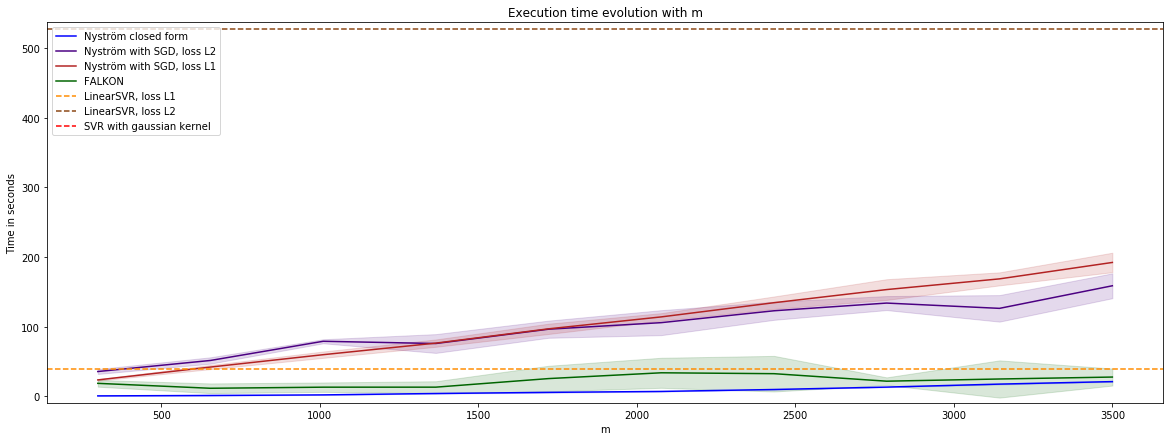

In [13]:
fig = plt.figure(figsize=(20,7)) 
ax = plt.subplot(1,1,1)

# ax.plot of the performance

y_max = max(max(np.mean(times_nys_plain, axis=1) + np.std(times_nys_plain, axis=1)),
            max(np.mean(times_nys_l2, axis=1) + np.std(times_nys_l2, axis=1)),
            max(np.mean(times_nys_l1, axis=1) + np.std(times_nys_l1, axis=1)),
            max(np.mean(times_falkon, axis=1) + np.std(times_falkon, axis=1)),
            time_lin_l1, time_lin_l2)+10
y_min = min(min(np.mean(times_nys_plain, axis=1) + np.std(times_nys_plain, axis=1)),
            min(np.mean(times_nys_l2, axis=1) + np.std(times_nys_l2, axis=1)),
            min(np.mean(times_nys_l1, axis=1) + np.std(times_nys_l1, axis=1)),
            min(np.mean(times_falkon, axis=1) + np.std(times_falkon, axis=1)),
            time_lin_l1, time_lin_l2)-10

ax.set_ylim(y_min, y_max)

ax.plot(list_D, np.mean(times_nys_plain, axis=1), '-', color='blue', label='Nyström closed form')
ax.fill_between(list_D, np.mean(times_nys_plain, axis=1) - np.std(times_nys_plain, axis=1),
             np.mean(times_nys_plain, axis=1) + np.std(times_nys_plain, axis=1), 
             color='blue', alpha=0.15)

ax.plot(list_D, np.mean(times_nys_l2, axis=1), '-', color='indigo', label='Nyström with SGD, loss L2')
ax.fill_between(list_D, np.mean(times_nys_l2, axis=1) - np.std(times_nys_l2, axis=1),
             np.mean(times_nys_l2, axis=1) + np.std(times_nys_l2, axis=1), 
             color='indigo', alpha=0.15)

ax.plot(list_D, np.mean(times_nys_l1, axis=1), '-', color='firebrick', label='Nyström with SGD, loss L1')
ax.fill_between(list_D, np.mean(times_nys_l1, axis=1) - np.std(times_nys_l1, axis=1),
             np.mean(times_nys_l1, axis=1) + np.std(times_nys_l1, axis=1), 
             color='firebrick', alpha=0.15)

ax.plot(list_D, np.mean(times_falkon, axis=1), '-', color='darkgreen', label='FALKON')
ax.fill_between(list_D, np.mean(times_falkon, axis=1) - np.std(times_falkon, axis=1),
             np.mean(times_falkon, axis=1) + np.std(times_falkon, axis=1), 
             color='darkgreen', alpha=0.15)

ax.axhline(y=time_lin_l1, color='darkorange', linestyle='--', label='LinearSVR, loss L1 ')
ax.axhline(y=time_lin_l2, color='saddlebrown', linestyle='--', label='LinearSVR, loss L2')
ax.axhline(y=time_gauss, color='r', linestyle='--', label='SVR with gaussian kernel')

ax.set_title("Execution time evolution with m")
ax.set_xlabel("m")
ax.set_ylabel("Time in seconds")

ax.legend(loc='upper left')

plt.savefig("CT_results/plots/m_time_nys_falkon.png")
plt.show()

In [14]:
print("SVC with gaussian kernel execution time:", time_gauss)

SVC with gaussian kernel execution time: 1285.832193851471


In [15]:
list_C = np.loadtxt('CT_results/list_C.csv', delimiter=',',skiprows=0)

In [16]:
mse_rff_l1_reg = np.loadtxt('CT_results/mse_rff_l1_reg.csv', delimiter=',',skiprows=0)
mse_train_rff_l1_reg = np.loadtxt('CT_results/mse_train_rff_l1_reg.csv', delimiter=',',skiprows=0)
mae_rff_l1_reg = np.loadtxt('CT_results/mae_rff_l1_reg.csv', delimiter=',',skiprows=0)
mae_train_rff_l1_reg = np.loadtxt('CT_results/mae_train_rff_l1_reg.csv', delimiter=',',skiprows=0)
times_rff_l1_reg = np.loadtxt('CT_results/times_rff_l1_reg.csv', delimiter=',',skiprows=0)
mse_rff_l2_reg = np.loadtxt('CT_results/mse_rff_l2_reg.csv', delimiter=',',skiprows=0)
mse_train_rff_l2_reg = np.loadtxt('CT_results/mse_train_rff_l2_reg.csv', delimiter=',',skiprows=0)
mae_rff_l2_reg = np.loadtxt('CT_results/mae_rff_l2_reg.csv', delimiter=',',skiprows=0)
mae_train_rff_l2_reg = np.loadtxt('CT_results/mae_train_rff_l2_reg.csv', delimiter=',',skiprows=0)
times_rff_l2_reg = np.loadtxt('CT_results/times_rff_l2_reg.csv', delimiter=',',skiprows=0)

In [17]:
mse_lin_l1_reg = np.loadtxt('CT_results/mse_lin_l1_reg.csv', delimiter=',',skiprows=0)
mse_train_lin_l1_reg = np.loadtxt('CT_results/mse_train_lin_l1_reg.csv', delimiter=',',skiprows=0)
mae_lin_l1_reg = np.loadtxt('CT_results/mae_lin_l1_reg.csv', delimiter=',',skiprows=0)
mae_train_lin_l1_reg = np.loadtxt('CT_results/mae_train_lin_l1_reg.csv', delimiter=',',skiprows=0)
times_lin_l1_reg = np.loadtxt('CT_results/times_lin_l1_reg.csv', delimiter=',',skiprows=0)
mse_lin_l2_reg = np.loadtxt('CT_results/mse_lin_l2_reg.csv', delimiter=',',skiprows=0)
mse_train_lin_l2_reg = np.loadtxt('CT_results/mse_train_lin_l2_reg.csv', delimiter=',',skiprows=0)
mae_lin_l2_reg = np.loadtxt('CT_results/mae_lin_l2_reg.csv', delimiter=',',skiprows=0)
mae_train_lin_l2_reg = np.loadtxt('CT_results/mae_train_lin_l2_reg.csv', delimiter=',',skiprows=0)
times_lin_l2_reg = np.loadtxt('CT_results/times_lin_l2_reg.csv', delimiter=',',skiprows=0)

In [18]:
mse_rff_l1_reg = np.log(mse_rff_l1_reg)
mse_train_rff_l1_reg = np.log(mse_train_rff_l1_reg)
mse_rff_l2_reg = np.log(mse_rff_l2_reg)
mse_train_rff_l2_reg = np.log(mse_train_rff_l2_reg)
mse_lin_l1_reg = np.log(mse_lin_l1_reg)
mse_train_lin_l1_reg = np.log(mse_train_lin_l1_reg)
mse_lin_l2_reg = np.log(mse_lin_l2_reg)
mse_lin_l2_reg = np.log(mse_train_lin_l2_reg)
mse_gauss = np.log(mse_gauss)

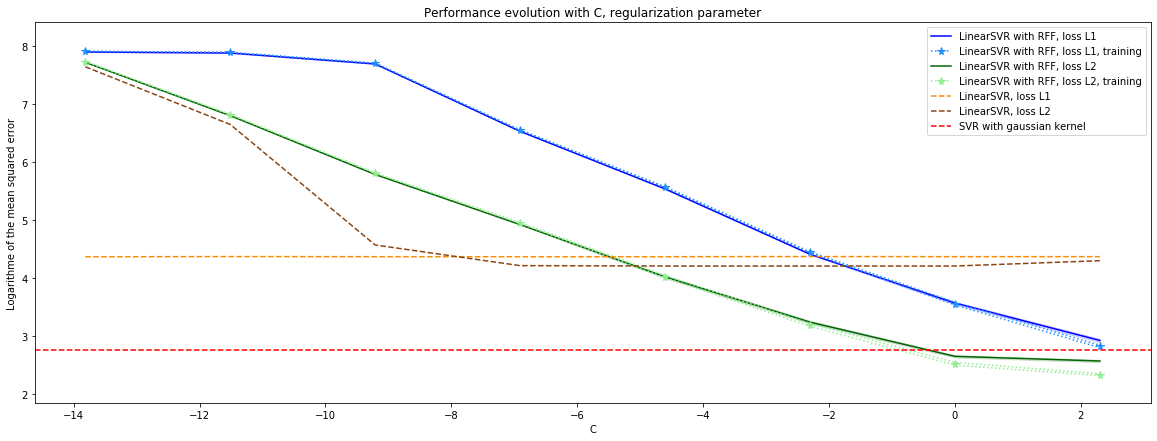

In [19]:
fig = plt.figure(figsize=(20,7)) 
ax = plt.subplot(1,1,1)

# ax.plot of the performance

y_max = max(max(np.mean(mse_rff_l1_reg, axis=1) + np.std(mse_rff_l1_reg, axis=1)),
            max(np.mean(mse_train_rff_l1_reg, axis=1) + np.std(mse_train_rff_l1_reg, axis=1)),
            max(np.mean(mse_rff_l2_reg, axis=1) + np.std(mse_rff_l2_reg, axis=1)),
            max(np.mean(mse_train_rff_l2_reg, axis=1) + np.std(mse_train_rff_l2_reg, axis=1)),
            max(mse_lin_l1_reg),max(mse_lin_l2_reg),mse_gauss)+0.5
y_min = min(min(np.mean(mse_rff_l1_reg, axis=1) + np.std(mse_rff_l1_reg, axis=1)),
            min(np.mean(mse_train_rff_l1_reg, axis=1) + np.std(mse_train_rff_l1_reg, axis=1)),
            min(np.mean(mse_rff_l2_reg, axis=1) + np.std(mse_rff_l2_reg, axis=1)),
            min(np.mean(mse_train_rff_l2_reg, axis=1) + np.std(mse_train_rff_l2_reg, axis=1)),
            min(mse_lin_l1_reg),min(mse_lin_l2_reg),mse_gauss)-0.5

ax.set_ylim(y_min, y_max)

ax.plot(np.log(list_C), np.mean(mse_rff_l1_reg, axis=1), '-', color='blue', label='LinearSVR with RFF, loss L1')
ax.fill_between(np.log(list_C), np.mean(mse_rff_l1_reg, axis=1) - np.std(mse_rff_l1_reg, axis=1),
             np.mean(mse_rff_l1_reg, axis=1) + np.std(mse_rff_l1_reg, axis=1), 
             color='blue', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mse_train_rff_l1_reg, axis=1), '*', markersize=8, color='dodgerblue',label='LinearSVR with RFF, loss L1, training')
ax.plot(np.log(list_C), np.mean(mse_train_rff_l1_reg, axis=1) - np.std(mse_train_rff_l1_reg, axis=1), ':',color='dodgerblue')
ax.plot(np.log(list_C), np.mean(mse_train_rff_l1_reg, axis=1) + np.std(mse_train_rff_l1_reg, axis=1), ':',color='dodgerblue')

ax.plot(np.log(list_C), np.mean(mse_rff_l2_reg, axis=1), '-', color='darkgreen', label='LinearSVR with RFF, loss L2')
ax.fill_between(np.log(list_C), np.mean(mse_rff_l2_reg, axis=1) - np.std(mse_rff_l2_reg, axis=1),
             np.mean(mse_rff_l2_reg, axis=1) + np.std(mse_rff_l2_reg, axis=1), 
             color='darkgreen', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mse_train_rff_l2_reg, axis=1), '*', markersize=8, color='lightgreen',label='LinearSVR with RFF, loss L2, training')
ax.plot(np.log(list_C), np.mean(mse_train_rff_l2_reg, axis=1) - np.std(mse_train_rff_l2_reg, axis=1), ':',color='lightgreen')
ax.plot(np.log(list_C), np.mean(mse_train_rff_l2_reg, axis=1) + np.std(mse_train_rff_l2_reg, axis=1), ':',color='lightgreen')


ax.plot(np.log(list_C), mse_lin_l1_reg, color='darkorange', linestyle='--', label='LinearSVR, loss L1')
ax.plot(np.log(list_C), mse_lin_l2_reg, color='saddlebrown', linestyle='--', label='LinearSVR, loss L2')
ax.axhline(y=mse_gauss, color='r', linestyle='--', label='SVR with gaussian kernel')

ax.set_title("Performance evolution with C, regularization parameter")
ax.set_xlabel("C")
ax.set_ylabel("Logarithme of the mean squared error")

handles, labels = ax.get_legend_handles_labels()
handles = [copy.copy(ha) for ha in handles ]
handles[1].set_linestyle(':')
handles[3].set_linestyle(':')
ax.legend(loc='upper right', handles=handles, labels=labels)

plt.savefig("CT_results/plots/Regularization_influence_mse_rff.png")
plt.show()

In [20]:
mae_rff_l1_reg = np.log(mae_rff_l1_reg)
mae_train_rff_l1_reg = np.log(mae_train_rff_l1_reg)
mae_rff_l2_reg = np.log(mae_rff_l2_reg)
mae_train_rff_l2_reg = np.log(mae_train_rff_l2_reg)
mae_lin_l1_reg = np.log(mae_lin_l1_reg)
mae_train_lin_l1_reg = np.log(mae_train_lin_l1_reg)
mae_lin_l2_reg = np.log(mae_lin_l2_reg)
mae_lin_l2_reg = np.log(mae_train_lin_l2_reg)
mae_gauss = np.log(mae_gauss)

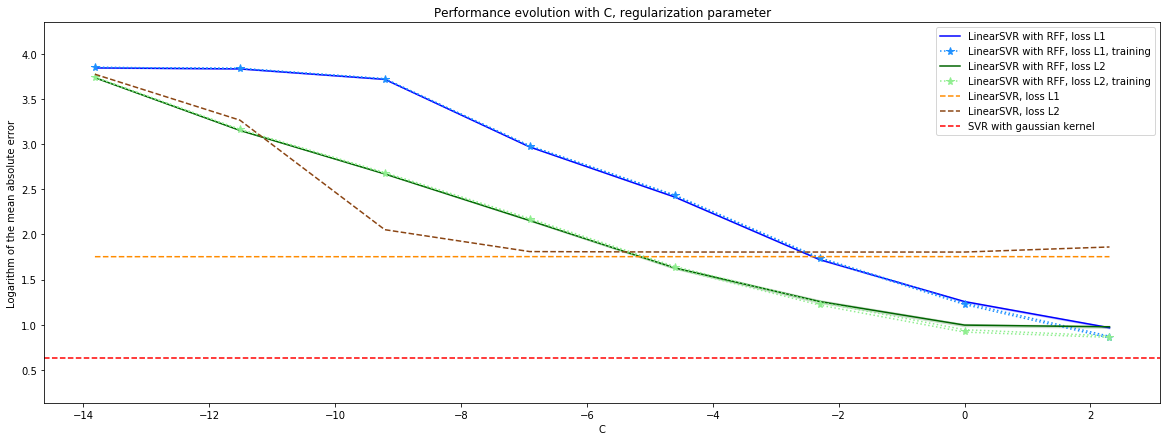

In [21]:
fig = plt.figure(figsize=(20,7)) 
ax = plt.subplot(1,1,1)

# ax.plot of the performance

y_max = max(max(np.mean(mae_rff_l1_reg, axis=1) + np.std(mae_rff_l1_reg, axis=1)),
            max(np.mean(mae_train_rff_l1_reg, axis=1) + np.std(mae_train_rff_l1_reg, axis=1)),
            max(np.mean(mae_rff_l2_reg, axis=1) + np.std(mae_rff_l2_reg, axis=1)),
            max(np.mean(mae_train_rff_l2_reg, axis=1) + np.std(mae_train_rff_l2_reg, axis=1)),
            max(mae_lin_l1_reg),max(mae_lin_l2_reg),mae_gauss)+0.5
y_min = min(min(np.mean(mae_rff_l1_reg, axis=1) + np.std(mae_rff_l1_reg, axis=1)),
            min(np.mean(mae_train_rff_l1_reg, axis=1) + np.std(mae_train_rff_l1_reg, axis=1)),
            min(np.mean(mae_rff_l2_reg, axis=1) + np.std(mae_rff_l2_reg, axis=1)),
            min(np.mean(mae_train_rff_l2_reg, axis=1) + np.std(mae_train_rff_l2_reg, axis=1)),
            min(mae_lin_l1_reg),min(mae_lin_l2_reg),mae_gauss)-0.5

ax.set_ylim(y_min, y_max)

ax.plot(np.log(list_C), np.mean(mae_rff_l1_reg, axis=1), '-', color='blue', label='LinearSVR with RFF, loss L1')
ax.fill_between(np.log(list_C), np.mean(mae_rff_l1_reg, axis=1) - np.std(mae_rff_l1_reg, axis=1),
             np.mean(mae_rff_l1_reg, axis=1) + np.std(mae_rff_l1_reg, axis=1), 
             color='blue', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mae_train_rff_l1_reg, axis=1), '*', markersize=8, color='dodgerblue',label='LinearSVR with RFF, loss L1, training')
ax.plot(np.log(list_C), np.mean(mae_train_rff_l1_reg, axis=1) - np.std(mae_train_rff_l1_reg, axis=1), ':',color='dodgerblue')
ax.plot(np.log(list_C), np.mean(mae_train_rff_l1_reg, axis=1) + np.std(mae_train_rff_l1_reg, axis=1), ':',color='dodgerblue')

ax.plot(np.log(list_C), np.mean(mae_rff_l2_reg, axis=1), '-', color='darkgreen', label='LinearSVR with RFF, loss L2')
ax.fill_between(np.log(list_C), np.mean(mae_rff_l2_reg, axis=1) - np.std(mae_rff_l2_reg, axis=1),
             np.mean(mae_rff_l2_reg, axis=1) + np.std(mae_rff_l2_reg, axis=1), 
             color='darkgreen', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mae_train_rff_l2_reg, axis=1), '*', markersize=8, color='lightgreen',label='LinearSVR with RFF, loss L2, training')
ax.plot(np.log(list_C), np.mean(mae_train_rff_l2_reg, axis=1) - np.std(mae_train_rff_l2_reg, axis=1), ':',color='lightgreen')
ax.plot(np.log(list_C), np.mean(mae_train_rff_l2_reg, axis=1) + np.std(mae_train_rff_l2_reg, axis=1), ':',color='lightgreen')


ax.plot(np.log(list_C), mae_lin_l1_reg, color='darkorange', linestyle='--', label='LinearSVR, loss L1')
ax.plot(np.log(list_C), mae_lin_l2_reg, color='saddlebrown', linestyle='--', label='LinearSVR, loss L2')
ax.axhline(y=mae_gauss, color='r', linestyle='--', label='SVR with gaussian kernel')

ax.set_title("Performance evolution with C, regularization parameter")
ax.set_xlabel("C")
ax.set_ylabel("Logarithm of the mean absolute error")

handles, labels = ax.get_legend_handles_labels()
handles = [copy.copy(ha) for ha in handles ]
handles[1].set_linestyle(':')
handles[3].set_linestyle(':')
ax.legend(loc='upper right', handles=handles, labels=labels)

plt.savefig("CT_results/plots/Regularization_influence_mae_rff.png")
plt.show()

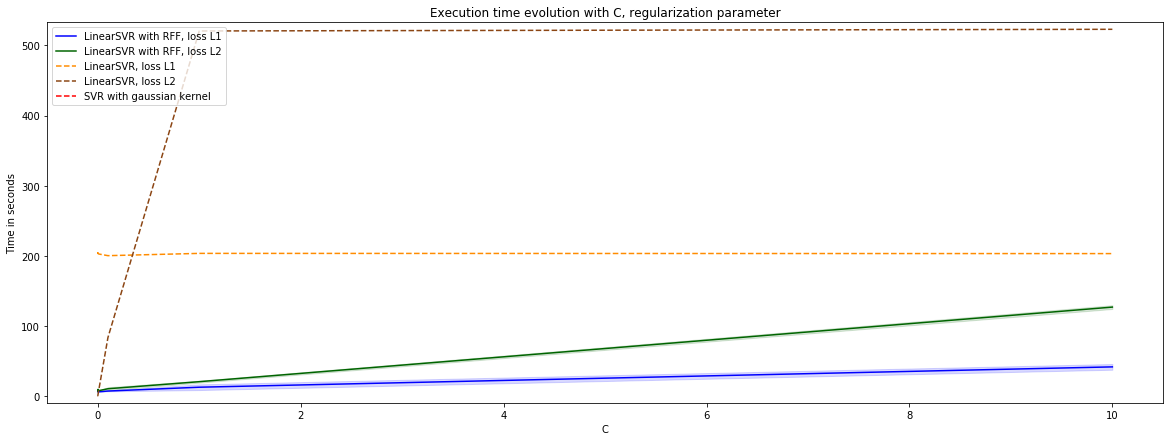

In [22]:
fig = plt.figure(figsize=(20,7)) 
ax = plt.subplot(1,1,1)

# ax.plot of the performance

y_max = max(max(np.mean(times_rff_l1_reg, axis=1) + np.std(times_rff_l1_reg, axis=1)),
            max(np.mean(times_rff_l2_reg, axis=1) + np.std(times_rff_l2_reg, axis=1)),
            max(times_lin_l1_reg),max(times_lin_l2_reg))+10
y_min = min(min(np.mean(times_rff_l1_reg, axis=1) + np.std(times_rff_l1_reg, axis=1)),
            min(np.mean(times_rff_l2_reg, axis=1) + np.std(times_rff_l2_reg, axis=1)),
            min(times_lin_l1_reg),min(times_lin_l2_reg))-10

ax.set_ylim(y_min, y_max)

ax.plot(list_C, np.mean(times_rff_l1_reg, axis=1), '-', color='blue', label='LinearSVR with RFF, loss L1')
ax.fill_between(list_C, np.mean(times_rff_l1_reg, axis=1) - np.std(times_rff_l1_reg, axis=1),
             np.mean(times_rff_l1_reg, axis=1) + np.std(times_rff_l1_reg, axis=1), 
             color='blue', alpha=0.15)

ax.plot(list_C, np.mean(times_rff_l2_reg, axis=1), '-', color='darkgreen', label='LinearSVR with RFF, loss L2')
ax.fill_between(list_C, np.mean(times_rff_l2_reg, axis=1) - np.std(times_rff_l2_reg, axis=1),
             np.mean(times_rff_l2_reg, axis=1) + np.std(times_rff_l2_reg, axis=1), 
             color='darkgreen', alpha=0.15)

ax.plot(list_C, times_lin_l1_reg, color='darkorange', linestyle='--', label='LinearSVR, loss L1')
ax.plot(list_C, times_lin_l2_reg, color='saddlebrown', linestyle='--', label='LinearSVR, loss L2')
ax.axhline(y=time_gauss, color='r', linestyle='--', label='SVR with gaussian kernel')

ax.set_title("Execution time evolution with C, regularization parameter")
ax.set_xlabel("C")
ax.set_ylabel("Time in seconds")

ax.legend(loc='upper left')

plt.savefig("CT_results/plots/Regularization_influence_time_rff.png")
plt.show()

In [23]:
print("SVC with gaussian kernel execution time:", time_gauss)

SVC with gaussian kernel execution time: 1285.832193851471


In [24]:
mse_nys_plain_reg = np.loadtxt('CT_results/mse_nys_plain_reg.csv', delimiter=',',skiprows=0)
mse_train_nys_plain_reg = np.loadtxt('CT_results/mse_train_nys_plain_reg.csv', delimiter=',',skiprows=0)
mae_nys_plain_reg = np.loadtxt('CT_results/mae_nys_plain_reg.csv', delimiter=',',skiprows=0)
mae_train_nys_plain_reg = np.loadtxt('CT_results/mae_train_nys_plain_reg.csv', delimiter=',',skiprows=0)
times_nys_plain_reg = np.loadtxt('CT_results/times_nys_plain_reg.csv', delimiter=',',skiprows=0)
mse_nys_l2_reg_l2 = np.loadtxt('CT_results/mse_nys_l2_reg_l2.csv', delimiter=',',skiprows=0)
mse_train_nys_l2_reg_l2 = np.loadtxt('CT_results/mse_train_nys_l2_reg_l2.csv', delimiter=',',skiprows=0)
mae_nys_l2_reg_l2 = np.loadtxt('CT_results/mae_nys_l2_reg_l2.csv', delimiter=',',skiprows=0)
mae_train_nys_l2_reg_l2 = np.loadtxt('CT_results/mae_train_nys_l2_reg_l2.csv', delimiter=',',skiprows=0)
times_nys_l2_reg_l2 = np.loadtxt('CT_results/times_nys_l2_reg_l2.csv', delimiter=',',skiprows=0)
mse_nys_l1_reg_l1 = np.loadtxt('CT_results/mse_nys_l1_reg_l1.csv', delimiter=',',skiprows=0)
mse_train_nys_l1_reg_l1 = np.loadtxt('CT_results/mse_train_nys_l1_reg_l1.csv', delimiter=',',skiprows=0)
mae_nys_l1_reg_l1 = np.loadtxt('CT_results/mae_nys_l1_reg_l1.csv', delimiter=',',skiprows=0)
mae_train_nys_l1_reg_l1 = np.loadtxt('CT_results/mae_train_nys_l1_reg_l1.csv', delimiter=',',skiprows=0)
times_nys_l1_reg_l1 = np.loadtxt('CT_results/times_nys_l1_reg_l1.csv', delimiter=',',skiprows=0)
mse_nys_l2_reg_l1 = np.loadtxt('CT_results/mse_nys_l2_reg_l1.csv', delimiter=',',skiprows=0)
mse_train_nys_l2_reg_l1 = np.loadtxt('CT_results/mse_train_nys_l2_reg_l1.csv', delimiter=',',skiprows=0)
mae_nys_l2_reg_l1 = np.loadtxt('CT_results/mae_nys_l2_reg_l1.csv', delimiter=',',skiprows=0)
mae_train_nys_l2_reg_l1 = np.loadtxt('CT_results/mae_train_nys_l2_reg_l1.csv', delimiter=',',skiprows=0)
times_nys_l2_reg_l1 = np.loadtxt('CT_results/times_nys_l2_reg_l1.csv', delimiter=',',skiprows=0)
mse_nys_l1_reg_l2 = np.loadtxt('CT_results/mse_nys_l1_reg_l2.csv', delimiter=',',skiprows=0)
mse_train_nys_l1_reg_l2 = np.loadtxt('CT_results/mse_train_nys_l1_reg_l2.csv', delimiter=',',skiprows=0)
mae_nys_l1_reg_l2 = np.loadtxt('CT_results/mae_nys_l1_reg_l2.csv', delimiter=',',skiprows=0)
mae_train_nys_l1_reg_l2 = np.loadtxt('CT_results/mae_train_nys_l1_reg_l2.csv', delimiter=',',skiprows=0)
times_nys_l1_reg_l2 = np.loadtxt('CT_results/times_nys_l1_reg_l2.csv', delimiter=',',skiprows=0)
mse_falkon_reg = np.loadtxt('CT_results/mse_falkon_reg.csv', delimiter=',',skiprows=0)
mse_train_falkon_reg = np.loadtxt('CT_results/mse_train_falkon_reg.csv', delimiter=',',skiprows=0)
mae_falkon_reg = np.loadtxt('CT_results/mae_falkon_reg.csv', delimiter=',',skiprows=0)
mae_train_falkon_reg = np.loadtxt('CT_results/mae_train_falkon_reg.csv', delimiter=',',skiprows=0)
times_falkon_reg = np.loadtxt('CT_results/times_falkon_reg.csv', delimiter=',',skiprows=0)

In [25]:
mse_nys_plain_reg = np.log(mse_nys_plain_reg)
mse_train_nys_plain_reg = np.log(mse_train_nys_plain_reg)
mse_nys_l2_reg_l2 = np.log(mse_nys_l2_reg_l2)
mse_train_nys_l2_reg_l2 = np.log(mse_train_nys_l2_reg_l2)
mse_nys_l2_reg_l1 = np.log(mse_nys_l2_reg_l1)
mse_train_nys_l2_reg_l1 = np.log(mse_train_nys_l2_reg_l1)
mse_nys_l1_reg_l1 = np.log(mse_nys_l1_reg_l1)
mse_train_nys_l1_reg_l1 = np.log(mse_train_nys_l1_reg_l1)
mse_nys_l1_reg_l2 = np.log(mse_nys_l1_reg_l2)
mse_train_nys_l1_reg_l2 = np.log(mse_train_nys_l1_reg_l2)
mse_falkon_reg = np.log(mse_falkon_reg)
mse_train_falkon_reg = np.log(mse_train_falkon_reg)

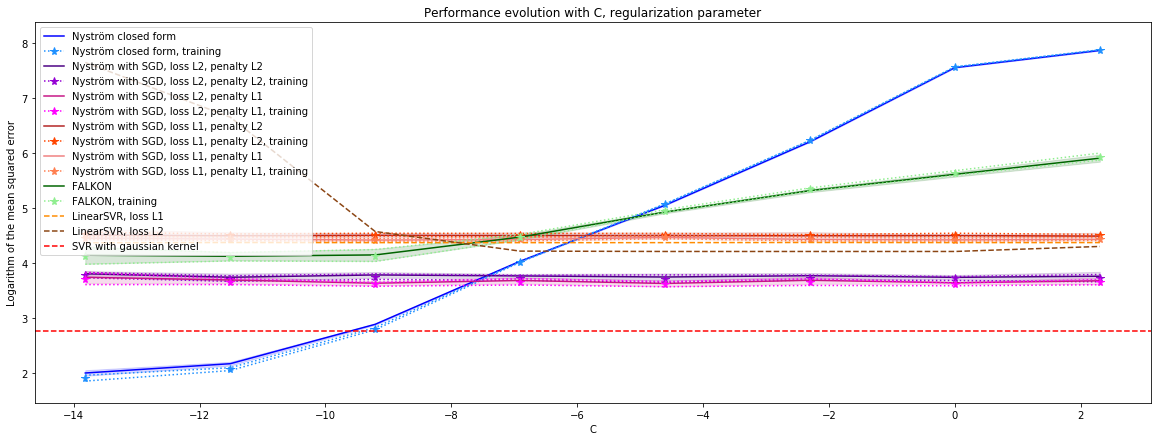

In [26]:
fig = plt.figure(figsize=(20,7)) 
ax = plt.subplot(1,1,1)

# ax.plot of the performance

y_max = max(max(np.mean(mse_nys_plain_reg, axis=1) + np.std(mse_nys_plain_reg, axis=1)),
            max(np.mean(mse_train_nys_plain_reg, axis=1) + np.std(mse_train_nys_plain_reg, axis=1)),
            max(np.mean(mse_nys_l2_reg_l2, axis=1) + np.std(mse_nys_l2_reg_l2, axis=1)),
            max(np.mean(mse_train_nys_l2_reg_l2, axis=1) + np.std(mse_train_nys_l2_reg_l2, axis=1)),
            max(np.mean(mse_nys_l1_reg_l1, axis=1) + np.std(mse_nys_l1_reg_l1, axis=1)),
            max(np.mean(mse_train_nys_l1_reg_l1, axis=1) + np.std(mse_train_nys_l1_reg_l1, axis=1)),
            max(np.mean(mse_falkon_reg, axis=1) + np.std(mse_falkon_reg, axis=1)),
            max(np.mean(mse_train_falkon_reg, axis=1) + np.std(mse_train_falkon_reg, axis=1)),
            max(mse_lin_l1_reg),max(mse_lin_l2_reg),mse_gauss)+0.5
y_min = min(min(np.mean(mse_nys_plain_reg, axis=1) + np.std(mse_nys_plain_reg, axis=1)),
            min(np.mean(mse_train_nys_plain_reg, axis=1) + np.std(mse_train_nys_plain_reg, axis=1)),
            min(np.mean(mse_nys_l2_reg_l2, axis=1) + np.std(mse_nys_l2_reg_l2, axis=1)),
            min(np.mean(mse_train_nys_l2_reg_l2, axis=1) + np.std(mse_train_nys_l2_reg_l2, axis=1)),
            min(np.mean(mse_nys_l1_reg_l1, axis=1) + np.std(mse_nys_l1_reg_l1, axis=1)),
            min(np.mean(mse_train_nys_l1_reg_l1, axis=1) + np.std(mse_train_nys_l1_reg_l1, axis=1)),
            min(np.mean(mse_falkon_reg, axis=1) + np.std(mse_falkon_reg, axis=1)),
            min(np.mean(mse_train_falkon_reg, axis=1) + np.std(mse_train_falkon_reg, axis=1)),
            min(mse_lin_l1_reg),min(mse_lin_l2_reg),mse_gauss)-0.5

ax.set_ylim(y_min, y_max)

ax.plot(np.log(list_C), np.mean(mse_nys_plain_reg, axis=1), '-', color='blue', label='Nyström closed form')
ax.fill_between(np.log(list_C), np.mean(mse_nys_plain_reg, axis=1) - np.std(mse_nys_plain_reg, axis=1),
             np.mean(mse_nys_plain_reg, axis=1) + np.std(mse_nys_plain_reg, axis=1), 
             color='blue', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mse_train_nys_plain_reg, axis=1), '*', markersize=8, color='dodgerblue',label='Nyström closed form, training')
ax.plot(np.log(list_C), np.mean(mse_train_nys_plain_reg, axis=1) - np.std(mse_train_nys_plain_reg, axis=1), ':',color='dodgerblue')
ax.plot(np.log(list_C), np.mean(mse_train_nys_plain_reg, axis=1) + np.std(mse_train_nys_plain_reg, axis=1), ':',color='dodgerblue')

ax.plot(np.log(list_C), np.mean(mse_nys_l2_reg_l2, axis=1), '-', color='indigo', label='Nyström with SGD, loss L2, penalty L2')
ax.fill_between(np.log(list_C), np.mean(mse_nys_l2_reg_l2, axis=1) - np.std(mse_nys_l2_reg_l2, axis=1),
             np.mean(mse_nys_l2_reg_l2, axis=1) + np.std(mse_nys_l2_reg_l2, axis=1), 
             color='indigo', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mse_train_nys_l2_reg_l2, axis=1), '*', markersize=8, color='darkviolet',label='Nyström with SGD, loss L2, penalty L2, training')
ax.plot(np.log(list_C), np.mean(mse_train_nys_l2_reg_l2, axis=1) - np.std(mse_train_nys_l2_reg_l2, axis=1), ':',color='darkviolet')
ax.plot(np.log(list_C), np.mean(mse_train_nys_l2_reg_l2, axis=1) + np.std(mse_train_nys_l2_reg_l2, axis=1), ':',color='darkviolet')

ax.plot(np.log(list_C), np.mean(mse_nys_l2_reg_l1, axis=1), '-', color='mediumvioletred', label='Nyström with SGD, loss L2, penalty L1')
ax.fill_between(np.log(list_C), np.mean(mse_nys_l2_reg_l1, axis=1) - np.std(mse_nys_l2_reg_l1, axis=1),
             np.mean(mse_nys_l2_reg_l1, axis=1) + np.std(mse_nys_l2_reg_l1, axis=1), 
             color='mediumvioletred', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mse_train_nys_l2_reg_l1, axis=1), '*', markersize=8, color='fuchsia',label='Nyström with SGD, loss L2, penalty L1, training')
ax.plot(np.log(list_C), np.mean(mse_train_nys_l2_reg_l1, axis=1) - np.std(mse_train_nys_l2_reg_l1, axis=1), ':',color='fuchsia')
ax.plot(np.log(list_C), np.mean(mse_train_nys_l2_reg_l1, axis=1) + np.std(mse_train_nys_l2_reg_l1, axis=1), ':',color='fuchsia')

ax.plot(np.log(list_C), np.mean(mse_nys_l1_reg_l2, axis=1), '-', color='firebrick', label='Nyström with SGD, loss L1, penalty L2')
ax.fill_between(np.log(list_C), np.mean(mse_nys_l1_reg_l2, axis=1) - np.std(mse_nys_l1_reg_l2, axis=1),
             np.mean(mse_nys_l1_reg_l2, axis=1) + np.std(mse_nys_l2_reg_l1, axis=1), 
             color='firebrick', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mse_train_nys_l1_reg_l2, axis=1), '*', markersize=8, color='orangered',label='Nyström with SGD, loss L1, penalty L2, training')
ax.plot(np.log(list_C), np.mean(mse_train_nys_l1_reg_l2, axis=1) - np.std(mse_train_nys_l1_reg_l2, axis=1), ':',color='orangered')
ax.plot(np.log(list_C), np.mean(mse_train_nys_l1_reg_l2, axis=1) + np.std(mse_train_nys_l1_reg_l2, axis=1), ':',color='orangered')

ax.plot(np.log(list_C), np.mean(mse_nys_l1_reg_l1, axis=1), '-', color='lightcoral', label='Nyström with SGD, loss L1, penalty L1')
ax.fill_between(np.log(list_C), np.mean(mse_nys_l1_reg_l1, axis=1) - np.std(mse_nys_l1_reg_l1, axis=1),
             np.mean(mse_nys_l1_reg_l1, axis=1) + np.std(mse_nys_l2_reg_l2, axis=1), 
             color='lightcoral', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mse_train_nys_l1_reg_l1, axis=1), '*', markersize=8, color='coral',label='Nyström with SGD, loss L1, penalty L1, training')
ax.plot(np.log(list_C), np.mean(mse_train_nys_l1_reg_l1, axis=1) - np.std(mse_train_nys_l1_reg_l1, axis=1), ':',color='coral')
ax.plot(np.log(list_C), np.mean(mse_train_nys_l1_reg_l1, axis=1) + np.std(mse_train_nys_l1_reg_l1, axis=1), ':',color='coral')

ax.plot(np.log(list_C), np.mean(mse_falkon_reg, axis=1), '-', color='darkgreen', label='FALKON')
ax.fill_between(np.log(list_C), np.mean(mse_falkon_reg, axis=1) - np.std(mse_falkon_reg, axis=1),
             np.mean(mse_falkon_reg, axis=1) + np.std(mse_falkon_reg, axis=1), 
             color='darkgreen', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mse_train_falkon_reg, axis=1), '*', markersize=8, color='lightgreen',label='FALKON, training')
ax.plot(np.log(list_C), np.mean(mse_train_falkon_reg, axis=1) - np.std(mse_train_falkon_reg, axis=1), ':',color='lightgreen')
ax.plot(np.log(list_C), np.mean(mse_train_falkon_reg, axis=1) + np.std(mse_train_falkon_reg, axis=1), ':',color='lightgreen')

ax.plot(np.log(list_C), mse_lin_l1_reg, color='darkorange', linestyle='--', label='LinearSVR, loss L1')
ax.plot(np.log(list_C), mse_lin_l2_reg, color='saddlebrown', linestyle='--', label='LinearSVR, loss L2')
ax.axhline(y=mse_gauss, color='r', linestyle='--', label='SVR with gaussian kernel')

ax.set_title("Performance evolution with C, regularization parameter")
ax.set_xlabel("C")
ax.set_ylabel("Logarithm of the mean squared error")

handles, labels = ax.get_legend_handles_labels()
handles = [copy.copy(ha) for ha in handles ]
handles[1].set_linestyle(':')
handles[3].set_linestyle(':')
handles[5].set_linestyle(':')
handles[7].set_linestyle(':')
handles[9].set_linestyle(':')
handles[11].set_linestyle(':')
ax.legend(loc='upper left', handles=handles, labels=labels)

plt.savefig("CT_results/plots/Regularization_influence_mse_nys_falkon.png")
plt.show()

In [27]:
mae_nys_plain_reg = np.log(mae_nys_plain_reg)
mae_train_nys_plain_reg = np.log(mae_train_nys_plain_reg)
mae_nys_l2_reg_l2 = np.log(mae_nys_l2_reg_l2)
mae_train_nys_l2_reg_l2 = np.log(mae_train_nys_l2_reg_l2)
mae_nys_l2_reg_l1 = np.log(mae_nys_l2_reg_l1)
mae_train_nys_l2_reg_l1 = np.log(mae_train_nys_l2_reg_l1)
mae_nys_l1_reg_l1 = np.log(mae_nys_l1_reg_l1)
mae_train_nys_l1_reg_l1 = np.log(mae_train_nys_l1_reg_l1)
mae_nys_l1_reg_l2 = np.log(mae_nys_l1_reg_l2)
mae_train_nys_l1_reg_l2 = np.log(mae_train_nys_l1_reg_l2)
mae_falkon_reg = np.log(mae_falkon_reg)
mae_train_falkon_reg = np.log(mae_train_falkon_reg)

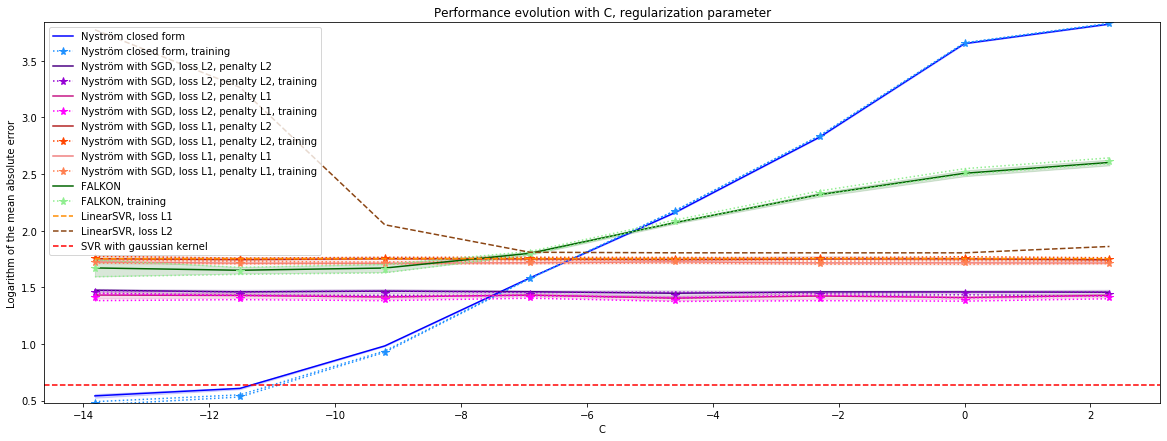

In [28]:
fig = plt.figure(figsize=(20,7)) 
ax = plt.subplot(1,1,1)

# ax.plot of the performance

y_max = max(max(np.mean(mae_nys_plain_reg, axis=1) + np.std(mae_nys_plain_reg, axis=1)),
            max(np.mean(mae_train_nys_plain_reg, axis=1) + np.std(mae_train_nys_plain_reg, axis=1)),
            max(np.mean(mae_nys_l2_reg_l2, axis=1) + np.std(mae_nys_l2_reg_l2, axis=1)),
            max(np.mean(mae_train_nys_l2_reg_l2, axis=1) + np.std(mae_train_nys_l2_reg_l2, axis=1)),
            max(np.mean(mae_nys_l1_reg_l1, axis=1) + np.std(mae_nys_l1_reg_l1, axis=1)),
            max(np.mean(mae_train_nys_l1_reg_l1, axis=1) + np.std(mae_train_nys_l1_reg_l1, axis=1)),
            max(np.mean(mae_falkon_reg, axis=1) + np.std(mae_falkon_reg, axis=1)),
            max(np.mean(mae_train_falkon_reg, axis=1) + np.std(mae_train_falkon_reg, axis=1)),
            max(mae_lin_l1_reg),max(mae_lin_l2_reg),mae_gauss)+0.01
y_min = min(min(np.mean(mae_nys_plain_reg, axis=1) + np.std(mae_nys_plain_reg, axis=1)),
            min(np.mean(mae_train_nys_plain_reg, axis=1) + np.std(mae_train_nys_plain_reg, axis=1)),
            min(np.mean(mae_nys_l2_reg_l2, axis=1) + np.std(mae_nys_l2_reg_l2, axis=1)),
            min(np.mean(mae_train_nys_l2_reg_l2, axis=1) + np.std(mae_train_nys_l2_reg_l2, axis=1)),
            min(np.mean(mae_nys_l1_reg_l1, axis=1) + np.std(mae_nys_l1_reg_l1, axis=1)),
            min(np.mean(mae_train_nys_l1_reg_l1, axis=1) + np.std(mae_train_nys_l1_reg_l1, axis=1)),
            min(np.mean(mae_falkon_reg, axis=1) + np.std(mae_falkon_reg, axis=1)),
            min(np.mean(mae_train_falkon_reg, axis=1) + np.std(mae_train_falkon_reg, axis=1)),
            min(mae_lin_l1_reg),min(mae_lin_l2_reg),mae_gauss)-0.01

ax.set_ylim(y_min, y_max)

ax.plot(np.log(list_C), np.mean(mae_nys_plain_reg, axis=1), '-', color='blue', label='Nyström closed form')
ax.fill_between(np.log(list_C), np.mean(mae_nys_plain_reg, axis=1) - np.std(mae_nys_plain_reg, axis=1),
             np.mean(mae_nys_plain_reg, axis=1) + np.std(mae_nys_plain_reg, axis=1), 
             color='blue', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mae_train_nys_plain_reg, axis=1), '*', markersize=8, color='dodgerblue',label='Nyström closed form, training')
ax.plot(np.log(list_C), np.mean(mae_train_nys_plain_reg, axis=1) - np.std(mae_train_nys_plain_reg, axis=1), ':',color='dodgerblue')
ax.plot(np.log(list_C), np.mean(mae_train_nys_plain_reg, axis=1) + np.std(mae_train_nys_plain_reg, axis=1), ':',color='dodgerblue')

ax.plot(np.log(list_C), np.mean(mae_nys_l2_reg_l2, axis=1), '-', color='indigo', label='Nyström with SGD, loss L2, penalty L2')
ax.fill_between(np.log(list_C), np.mean(mae_nys_l2_reg_l2, axis=1) - np.std(mae_nys_l2_reg_l2, axis=1),
             np.mean(mae_nys_l2_reg_l2, axis=1) + np.std(mae_nys_l2_reg_l2, axis=1), 
             color='indigo', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mae_train_nys_l2_reg_l2, axis=1), '*', markersize=8, color='darkviolet',label='Nyström with SGD, loss L2, penalty L2, training')
ax.plot(np.log(list_C), np.mean(mae_train_nys_l2_reg_l2, axis=1) - np.std(mae_train_nys_l2_reg_l2, axis=1), ':',color='darkviolet')
ax.plot(np.log(list_C), np.mean(mae_train_nys_l2_reg_l2, axis=1) + np.std(mae_train_nys_l2_reg_l2, axis=1), ':',color='darkviolet')

ax.plot(np.log(list_C), np.mean(mae_nys_l2_reg_l1, axis=1), '-', color='mediumvioletred', label='Nyström with SGD, loss L2, penalty L1')
ax.fill_between(np.log(list_C), np.mean(mae_nys_l2_reg_l1, axis=1) - np.std(mae_nys_l2_reg_l1, axis=1),
             np.mean(mae_nys_l2_reg_l1, axis=1) + np.std(mae_nys_l2_reg_l1, axis=1), 
             color='mediumvioletred', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mae_train_nys_l2_reg_l1, axis=1), '*', markersize=8, color='fuchsia',label='Nyström with SGD, loss L2, penalty L1, training')
ax.plot(np.log(list_C), np.mean(mae_train_nys_l2_reg_l1, axis=1) - np.std(mae_train_nys_l2_reg_l1, axis=1), ':',color='fuchsia')
ax.plot(np.log(list_C), np.mean(mae_train_nys_l2_reg_l1, axis=1) + np.std(mae_train_nys_l2_reg_l1, axis=1), ':',color='fuchsia')

ax.plot(np.log(list_C), np.mean(mae_nys_l1_reg_l2, axis=1), '-', color='firebrick', label='Nyström with SGD, loss L1, penalty L2')
ax.fill_between(np.log(list_C), np.mean(mae_nys_l1_reg_l2, axis=1) - np.std(mae_nys_l1_reg_l2, axis=1),
             np.mean(mae_nys_l1_reg_l2, axis=1) + np.std(mae_nys_l2_reg_l1, axis=1), 
             color='firebrick', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mae_train_nys_l1_reg_l2, axis=1), '*', markersize=8, color='orangered',label='Nyström with SGD, loss L1, penalty L2, training')
ax.plot(np.log(list_C), np.mean(mae_train_nys_l1_reg_l2, axis=1) - np.std(mae_train_nys_l1_reg_l2, axis=1), ':',color='orangered')
ax.plot(np.log(list_C), np.mean(mae_train_nys_l1_reg_l2, axis=1) + np.std(mae_train_nys_l1_reg_l2, axis=1), ':',color='orangered')

ax.plot(np.log(list_C), np.mean(mae_nys_l1_reg_l1, axis=1), '-', color='lightcoral', label='Nyström with SGD, loss L1, penalty L1')
ax.fill_between(np.log(list_C), np.mean(mae_nys_l1_reg_l1, axis=1) - np.std(mae_nys_l1_reg_l1, axis=1),
             np.mean(mae_nys_l1_reg_l1, axis=1) + np.std(mae_nys_l2_reg_l2, axis=1), 
             color='lightcoral', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mae_train_nys_l1_reg_l1, axis=1), '*', markersize=8, color='coral',label='Nyström with SGD, loss L1, penalty L1, training')
ax.plot(np.log(list_C), np.mean(mae_train_nys_l1_reg_l1, axis=1) - np.std(mae_train_nys_l1_reg_l1, axis=1), ':',color='coral')
ax.plot(np.log(list_C), np.mean(mae_train_nys_l1_reg_l1, axis=1) + np.std(mae_train_nys_l1_reg_l1, axis=1), ':',color='coral')

ax.plot(np.log(list_C), np.mean(mae_falkon_reg, axis=1), '-', color='darkgreen', label='FALKON')
ax.fill_between(np.log(list_C), np.mean(mae_falkon_reg, axis=1) - np.std(mae_falkon_reg, axis=1),
             np.mean(mae_falkon_reg, axis=1) + np.std(mae_falkon_reg, axis=1), 
             color='darkgreen', alpha=0.15)

ax.plot(np.log(list_C), np.mean(mae_train_falkon_reg, axis=1), '*', markersize=8, color='lightgreen',label='FALKON, training')
ax.plot(np.log(list_C), np.mean(mae_train_falkon_reg, axis=1) - np.std(mae_train_falkon_reg, axis=1), ':',color='lightgreen')
ax.plot(np.log(list_C), np.mean(mae_train_falkon_reg, axis=1) + np.std(mae_train_falkon_reg, axis=1), ':',color='lightgreen')

ax.plot(np.log(list_C), mae_lin_l1_reg, color='darkorange', linestyle='--', label='LinearSVR, loss L1')
ax.plot(np.log(list_C), mae_lin_l2_reg, color='saddlebrown', linestyle='--', label='LinearSVR, loss L2')
ax.axhline(y=mae_gauss, color='r', linestyle='--', label='SVR with gaussian kernel')

ax.set_title("Performance evolution with C, regularization parameter")
ax.set_xlabel("C")
ax.set_ylabel("Logarithm of the mean absolute error")

handles, labels = ax.get_legend_handles_labels()
handles = [copy.copy(ha) for ha in handles ]
handles[1].set_linestyle(':')
handles[3].set_linestyle(':')
handles[5].set_linestyle(':')
handles[7].set_linestyle(':')
handles[9].set_linestyle(':')
handles[11].set_linestyle(':')
ax.legend(loc='upper left', handles=handles, labels=labels)

plt.savefig("CT_results/plots/Regularization_influence_mae_nys_falkon.png")
plt.show()

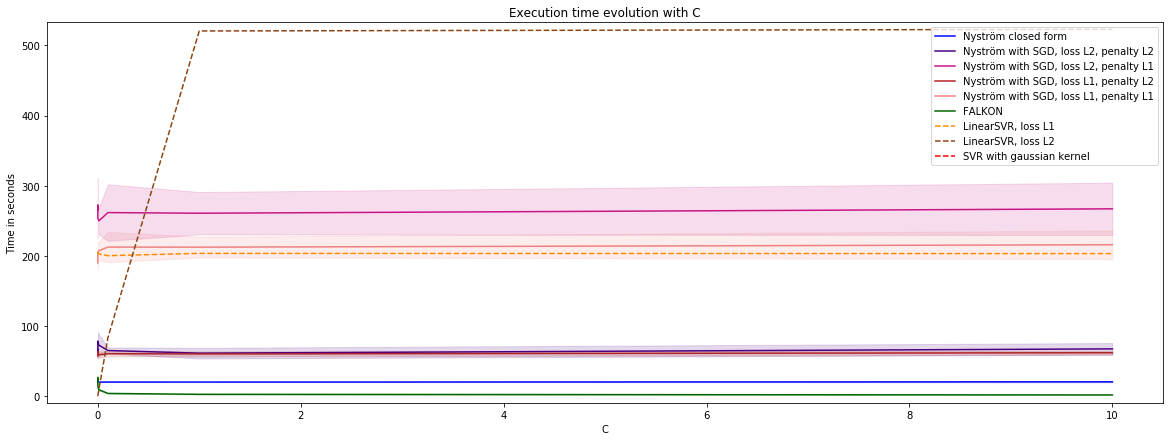

In [29]:
fig = plt.figure(figsize=(20,7)) 
ax = plt.subplot(1,1,1)

# ax.plot of the performance

y_max = max(max(np.mean(times_nys_plain_reg, axis=1) + np.std(times_nys_plain_reg, axis=1)),
            max(np.mean(times_nys_l2_reg_l2, axis=1) + np.std(times_nys_l2_reg_l2, axis=1)),
            max(np.mean(times_nys_l1_reg_l1, axis=1) + np.std(times_nys_l1_reg_l1, axis=1)),
            max(np.mean(times_falkon_reg, axis=1) + np.std(times_falkon_reg, axis=1)),
            max(times_lin_l1_reg),max(times_lin_l2_reg))+10
y_min = min(min(np.mean(times_nys_plain_reg, axis=1) + np.std(times_nys_plain_reg, axis=1)),
            min(np.mean(times_nys_l2_reg_l2, axis=1) + np.std(times_nys_l2_reg_l2, axis=1)),
            min(np.mean(times_nys_l1_reg_l1, axis=1) + np.std(times_nys_l1_reg_l1, axis=1)),
            min(np.mean(times_falkon_reg, axis=1) + np.std(times_falkon_reg, axis=1)),
            min(times_lin_l1_reg),min(times_lin_l2_reg))-10

ax.set_ylim(y_min, y_max)

ax.plot(list_C, np.mean(times_nys_plain_reg, axis=1), '-', color='blue', label='Nyström closed form')
ax.fill_between(list_C, np.mean(times_nys_plain_reg, axis=1) - np.std(times_nys_plain_reg, axis=1),
             np.mean(times_nys_plain_reg, axis=1) + np.std(times_nys_plain_reg, axis=1), 
             color='blue', alpha=0.15)

ax.plot(list_C, np.mean(times_nys_l2_reg_l2, axis=1), '-', color='indigo', label='Nyström with SGD, loss L2, penalty L2')
ax.fill_between(list_C, np.mean(times_nys_l2_reg_l2, axis=1) - np.std(times_nys_l2_reg_l2, axis=1),
             np.mean(times_nys_l2_reg_l2, axis=1) + np.std(times_nys_l2_reg_l2, axis=1), 
             color='indigo', alpha=0.15)

ax.plot(list_C, np.mean(times_nys_l2_reg_l1, axis=1), '-', color='mediumvioletred', label='Nyström with SGD, loss L2, penalty L1')
ax.fill_between(list_C, np.mean(times_nys_l2_reg_l1, axis=1) - np.std(times_nys_l2_reg_l1, axis=1),
             np.mean(times_nys_l2_reg_l1, axis=1) + np.std(times_nys_l2_reg_l1, axis=1), 
             color='mediumvioletred', alpha=0.15)

ax.plot(list_C, np.mean(times_nys_l1_reg_l2, axis=1), '-', color='firebrick', label='Nyström with SGD, loss L1, penalty L2')
ax.fill_between(list_C, np.mean(times_nys_l1_reg_l2, axis=1) - np.std(times_nys_l1_reg_l2, axis=1),
             np.mean(times_nys_l1_reg_l2, axis=1) + np.std(times_nys_l1_reg_l2, axis=1), 
             color='firebrick', alpha=0.15)

ax.plot(list_C, np.mean(times_nys_l1_reg_l1, axis=1), '-', color='lightcoral', label='Nyström with SGD, loss L1, penalty L1')
ax.fill_between(list_C, np.mean(times_nys_l1_reg_l1, axis=1) - np.std(times_nys_l1_reg_l1, axis=1),
             np.mean(times_nys_l1_reg_l1, axis=1) + np.std(times_nys_l1_reg_l1, axis=1), 
             color='lightcoral', alpha=0.15)

ax.plot(list_C, np.mean(times_falkon_reg, axis=1), '-', color='darkgreen', label='FALKON')
ax.fill_between(list_C, np.mean(times_falkon_reg, axis=1) - np.std(times_falkon_reg, axis=1),
             np.mean(times_falkon_reg, axis=1) + np.std(times_falkon_reg, axis=1), 
             color='darkgreen', alpha=0.15)

ax.plot(list_C, times_lin_l1_reg, color='darkorange', linestyle='--', label='LinearSVR, loss L1')
ax.plot(list_C, times_lin_l2_reg, color='saddlebrown', linestyle='--', label='LinearSVR, loss L2')
ax.axhline(y=time_gauss, color='r', linestyle='--', label='SVR with gaussian kernel')

ax.set_title("Execution time evolution with C")
ax.set_xlabel("C")
ax.set_ylabel("Time in seconds")

ax.legend(loc='upper right')

plt.savefig("CT_results/plots/Regularization_influence_time_nys.png")
plt.show()

In [30]:
print("SVC with gaussian kernel execution time:", time_gauss)

SVC with gaussian kernel execution time: 1285.832193851471


# Classification

In [31]:
scores_lin_h_l2 = np.loadtxt('synthetic_clf_results/scores_lin_h_l2.csv', delimiter=',',skiprows=0)
scores_train_lin_h_l2 = np.loadtxt('synthetic_clf_results/scores_train_lin_h_l2.csv', delimiter=',',skiprows=0)
times_lin_h_l2 = np.loadtxt('synthetic_clf_results/times_lin_h_l2.csv', delimiter=',',skiprows=0)
scores_lin_sh_l1 = np.loadtxt('synthetic_clf_results/scores_lin_sh_l1.csv', delimiter=',',skiprows=0)
scores_train_lin_sh_l1 = np.loadtxt('synthetic_clf_results/scores_train_lin_sh_l1.csv', delimiter=',',skiprows=0)
times_lin_sh_l1 = np.loadtxt('synthetic_clf_results/times_lin_sh_l1.csv', delimiter=',',skiprows=0)
scores_lin_sh_l2 = np.loadtxt('synthetic_clf_results/scores_lin_sh_l2.csv', delimiter=',',skiprows=0)
scores_train_lin_sh_l2 = np.loadtxt('synthetic_clf_results/scores_train_lin_sh_l2.csv', delimiter=',',skiprows=0)
times_lin_sh_l2 = np.loadtxt('synthetic_clf_results/times_lin_sh_l2.csv', delimiter=',',skiprows=0)
score_gauss = float(np.loadtxt('synthetic_clf_results/score_gauss.csv', delimiter=',',skiprows=0))
score_train_gauss = float(np.loadtxt('synthetic_clf_results/score_train_gauss.csv', delimiter=',',skiprows=0))
time_gauss = float(np.loadtxt('synthetic_clf_results/time_gauss.csv', delimiter=',',skiprows=0))

In [32]:
scores_rff_h = np.loadtxt('synthetic_clf_results/scores_rff_h.csv', delimiter=',',skiprows=0)
scores_train_rff_h = np.loadtxt('synthetic_clf_results/scores_train_rff_h.csv', delimiter=',',skiprows=0)
times_rff_h = np.loadtxt('synthetic_clf_results/times_rff_h.csv', delimiter=',',skiprows=0)
scores_rff_sh = np.loadtxt('synthetic_clf_results/scores_rff_sh.csv', delimiter=',',skiprows=0)
scores_train_rff_sh = np.loadtxt('synthetic_clf_results/scores_train_rff_sh.csv', delimiter=',',skiprows=0)
times_rff_sh = np.loadtxt('synthetic_clf_results/times_rff_sh.csv', delimiter=',',skiprows=0)
list_C = np.loadtxt('synthetic_clf_results/list_C.csv', delimiter=',',skiprows=0)

In [33]:
scores_rff_l1 = np.loadtxt('synthetic_clf_results/scores_rff_l1.csv', delimiter=',',skiprows=0)
scores_train_rff_l1 = np.loadtxt('synthetic_clf_results/scores_train_rff_l1.csv', delimiter=',',skiprows=0)
times_rff_l1 = np.loadtxt('synthetic_clf_results/times_rff_l1.csv', delimiter=',',skiprows=0)

In [34]:
scores_nys_h = np.loadtxt('synthetic_clf_results/scores_nys_h.csv', delimiter=',',skiprows=0)
scores_train_nys_h = np.loadtxt('synthetic_clf_results/scores_train_nys_h.csv', delimiter=',',skiprows=0)
times_nys_h = np.loadtxt('synthetic_clf_results/times_nys_h.csv', delimiter=',',skiprows=0)

In [35]:
scores_nys_l1 = np.loadtxt('synthetic_clf_results/scores_nys_l1.csv', delimiter=',',skiprows=0)
scores_train_nys_l1 = np.loadtxt('synthetic_clf_results/scores_train_nys_l1.csv', delimiter=',',skiprows=0)
times_nys_l1 = np.loadtxt('synthetic_clf_results/times_nys_l1.csv', delimiter=',',skiprows=0)

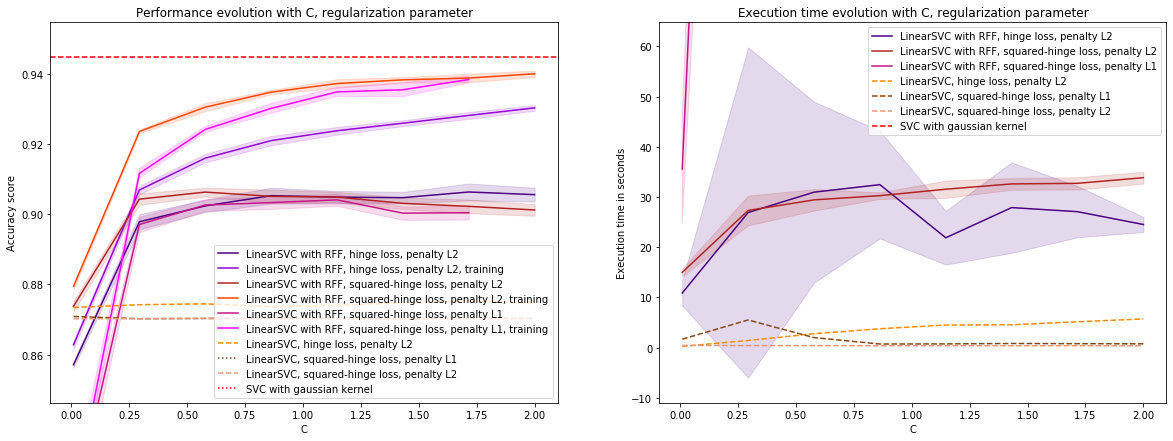

In [36]:
fig = plt.figure(figsize=(20,7)) 

# ax1.plot of the performance

ax1 = plt.subplot(1,2,1)

y_max = max(max(np.mean(scores_rff_h, axis=1) + np.std(scores_rff_h, axis=1)),
            max(np.mean(scores_train_rff_h, axis=1) + np.std(scores_train_rff_h, axis=1)),
            max(np.mean(scores_rff_sh, axis=1) + np.std(scores_rff_sh, axis=1)),
            max(np.mean(scores_train_rff_sh, axis=1) + np.std(scores_train_rff_sh, axis=1)),
            max(np.mean(scores_nys_h, axis=1) + np.std(scores_nys_h, axis=1)),
            max(np.mean(scores_train_nys_l1, axis=1) + np.std(scores_train_nys_l1, axis=1)),
            max(np.mean(scores_nys_l1, axis=1) + np.std(scores_nys_l1, axis=1)),
            max(np.mean(scores_train_nys_h, axis=1) + np.std(scores_train_nys_h, axis=1)),
            float(max(scores_lin_h_l2)),float(max(scores_lin_sh_l1)),float(max(scores_lin_sh_l2)), score_gauss)+0.01
y_min = min(min(np.mean(scores_rff_h, axis=1) - np.std(scores_rff_h, axis=1)),
            min(np.mean(scores_train_rff_h, axis=1) - np.std(scores_train_rff_h, axis=1)),
            min(np.mean(scores_rff_sh, axis=1) - np.std(scores_rff_sh, axis=1)),
            min(np.mean(scores_train_rff_sh, axis=1) - np.std(scores_train_rff_sh, axis=1)),
            min(np.mean(scores_nys_h, axis=1) - np.std(scores_nys_h, axis=1)),
            min(np.mean(scores_train_nys_h, axis=1) - np.std(scores_train_nys_h, axis=1)),
            min(np.mean(scores_nys_l1, axis=1) - np.std(scores_nys_l1, axis=1)),
            min(np.mean(scores_train_nys_l1, axis=1) - np.std(scores_train_nys_l1, axis=1)),
            float(min(scores_lin_h_l2)),float(max(scores_lin_sh_l1)),float(max(scores_lin_sh_l2)), score_gauss)-0.01

ax1.set_ylim(y_min, y_max)

ax1.plot(list_C, np.mean(scores_rff_h, axis=1), '-', color='indigo', label='LinearSVC with RFF, hinge loss, penalty L2')
ax1.fill_between(list_C, np.mean(scores_rff_h, axis=1) - np.std(scores_rff_h, axis=1),
                 np.mean(scores_rff_h, axis=1) + np.std(scores_rff_h, axis=1), 
                 color='indigo', alpha=0.15)

ax1.plot(list_C, np.mean(scores_train_rff_h, axis=1), '-', color='darkviolet', label='LinearSVC with RFF, hinge loss, penalty L2, training')
ax1.fill_between(list_C, np.mean(scores_train_rff_h, axis=1) - np.std(scores_train_rff_h, axis=1),
                 np.mean(scores_train_rff_h, axis=1) + np.std(scores_train_rff_h, axis=1), 
                 color='darkviolet', alpha=0.15)

ax1.plot(list_C, np.mean(scores_rff_sh, axis=1), '-', color='firebrick', label='LinearSVC with RFF, squared-hinge loss, penalty L2')
ax1.fill_between(list_C, np.mean(scores_rff_sh, axis=1) - np.std(scores_rff_sh, axis=1),
                 np.mean(scores_rff_sh, axis=1) + np.std(scores_rff_sh, axis=1), 
                 color='firebrick', alpha=0.15)

ax1.plot(list_C, np.mean(scores_train_rff_sh, axis=1), '-', color='orangered', label='LinearSVC with RFF, squared-hinge loss, penalty L2, training')
ax1.fill_between(list_C, np.mean(scores_train_rff_sh, axis=1) - np.std(scores_train_rff_sh, axis=1),
                 np.mean(scores_train_rff_sh, axis=1) + np.std(scores_train_rff_sh, axis=1), 
                 color='orangered', alpha=0.15)

ax1.plot(list_C[0:7], np.mean(scores_rff_l1[0:7], axis=1), '-', color='mediumvioletred', label='LinearSVC with RFF, squared-hinge loss, penalty L1')
ax1.fill_between(list_C[0:7], np.mean(scores_rff_l1[0:7], axis=1) - np.std(scores_rff_l1[0:7], axis=1),
                 np.mean(scores_rff_l1[0:7], axis=1) + np.std(scores_rff_l1[0:7], axis=1), 
                 color='mediumvioletred', alpha=0.15)

ax1.plot(list_C[0:7], np.mean(scores_train_rff_l1[0:7], axis=1), '-', color='fuchsia', label='LinearSVC with RFF, squared-hinge loss, penalty L1, training')
ax1.fill_between(list_C[0:7], np.mean(scores_train_rff_l1[0:7], axis=1) - np.std(scores_train_rff_l1[0:7], axis=1),
                 np.mean(scores_train_rff_l1[0:7], axis=1) + np.std(scores_train_rff_l1[0:7], axis=1), 
                 color='fuchsia', alpha=0.15)

ax1.plot(list_C, scores_lin_h_l2, color='darkorange', linestyle='--', label='LinearSVC, hinge loss, penalty L2')
ax1.plot(list_C, scores_lin_sh_l1, color='saddlebrown', linestyle='--', label='LinearSVC, squared-hinge loss, penalty L1')
ax1.plot(list_C, scores_lin_sh_l2, color='darksalmon', linestyle='--', label='LinearSVC, squared-hinge loss, penalty L2')

ax1.axhline(y=score_gauss, color='r', linestyle='--', label='SVC with gaussian kernel')

ax1.set_title("Performance evolution with C, regularization parameter")
ax1.set_xlabel("C")
ax1.set_ylabel("Accuracy score")

handles, labels = ax1.get_legend_handles_labels()
handles = [copy.copy(ha) for ha in handles ]
handles[7].set_linestyle(':')
handles[9].set_linestyle(':')
ax1.legend(loc='lower right', handles=handles, labels=labels)

# ax1.plot of the execution time

ax2 = plt.subplot(1,2,2)

y_max = max(max(np.mean(times_rff_h, axis=1) + np.std(times_rff_h, axis=1)),
            max(np.mean(times_rff_sh, axis=1) + np.std(times_rff_sh, axis=1)),
            max(np.mean(times_nys_h, axis=1) + np.std(times_nys_h, axis=1)),
            float(max(times_lin_h_l2)))+5
y_min = min(min(np.mean(times_rff_h, axis=1) - np.std(times_rff_h, axis=1)),
            min(np.mean(times_rff_sh, axis=1) - np.std(times_rff_sh, axis=1)),
            min(np.mean(times_nys_h, axis=1) - np.std(times_nys_h, axis=1)),
            float(min(times_lin_h_l2)))-5

ax2.set_ylim(y_min, y_max)

ax2.plot(list_C, np.mean(times_rff_h, axis=1), '-', color='indigo', label='LinearSVC with RFF, hinge loss, penalty L2')
ax2.fill_between(list_C, np.mean(times_rff_h, axis=1) - np.std(times_rff_h, axis=1),
                 np.mean(times_rff_h, axis=1) + np.std(times_rff_h, axis=1), 
                 color='indigo', alpha=0.15)

ax2.plot(list_C, np.mean(times_rff_sh, axis=1), '-', color='firebrick', label='LinearSVC with RFF, squared-hinge loss, penalty L2')
ax2.fill_between(list_C, np.mean(times_rff_sh, axis=1) - np.std(times_rff_sh, axis=1),
                 np.mean(times_rff_sh, axis=1) + np.std(times_rff_sh, axis=1), 
                 color='firebrick', alpha=0.15)

ax2.plot(list_C[0:7], np.mean(times_rff_l1[0:7], axis=1), '-', color='mediumvioletred', label='LinearSVC with RFF, squared-hinge loss, penalty L1')
ax2.fill_between(list_C[0:7], np.mean(times_rff_l1[0:7], axis=1) - np.std(times_rff_l1[0:7], axis=1),
                 np.mean(times_rff_l1[0:7], axis=1) + np.std(times_rff_l1[0:7], axis=1), 
                 color='mediumvioletred', alpha=0.15)

ax2.plot(list_C, times_lin_h_l2, color='darkorange', linestyle='--', label='LinearSVC, hinge loss, penalty L2')
ax2.plot(list_C, times_lin_sh_l1, color='saddlebrown', linestyle='--', label='LinearSVC, squared-hinge loss, penalty L1')
ax2.plot(list_C, times_lin_sh_l2, color='darksalmon', linestyle='--', label='LinearSVC, squared-hinge loss, penalty L2')

ax2.axhline(y=time_gauss, color='r', linestyle='--', label='SVC with gaussian kernel')

ax2.set_title("Execution time evolution with C, regularization parameter")
ax2.set_xlabel("C")
ax2.set_ylabel("Execution time in seconds")

ax2.legend(loc='upper right')

plt.savefig("synthetic_clf_results/plots/Regularization_loss_influence_rff.png")
plt.show()

/Users/margauxzaffran/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


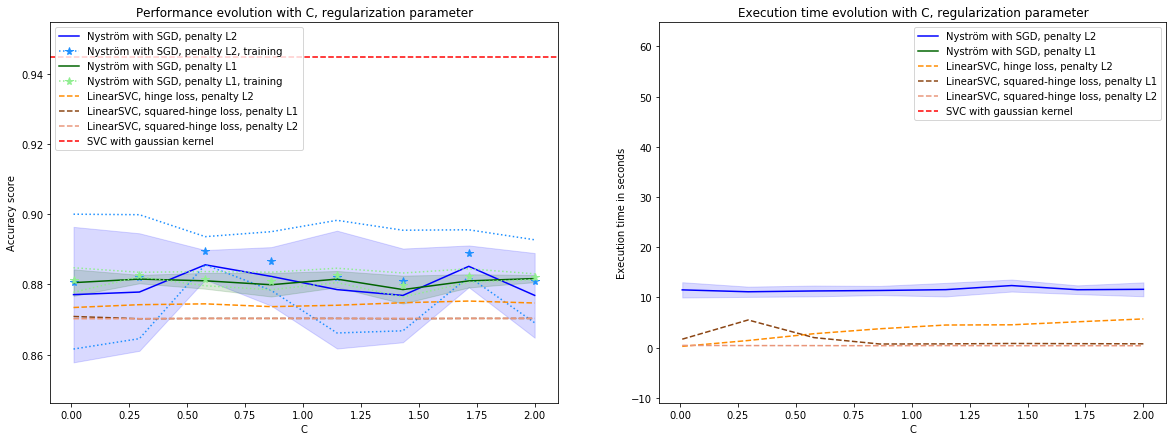

In [37]:
fig = plt.figure(figsize=(20,7)) 

# ax1.plot of the performance

ax1 = plt.subplot(1,2,1)

y_max = max(max(np.mean(scores_rff_h, axis=1) + np.std(scores_rff_h, axis=1)),
            max(np.mean(scores_train_rff_h, axis=1) + np.std(scores_train_rff_h, axis=1)),
            max(np.mean(scores_rff_sh, axis=1) + np.std(scores_rff_sh, axis=1)),
            max(np.mean(scores_train_rff_sh, axis=1) + np.std(scores_train_rff_sh, axis=1)),
            max(np.mean(scores_nys_h, axis=1) + np.std(scores_nys_h, axis=1)),
            max(np.mean(scores_train_nys_l1, axis=1) + np.std(scores_train_nys_l1, axis=1)),
            max(np.mean(scores_nys_l1, axis=1) + np.std(scores_nys_l1, axis=1)),
            max(np.mean(scores_train_nys_h, axis=1) + np.std(scores_train_nys_h, axis=1)),
            float(max(scores_lin_h_l2)),float(max(scores_lin_sh_l1)),float(max(scores_lin_sh_l2)), score_gauss)+0.01
y_min = min(min(np.mean(scores_rff_h, axis=1) - np.std(scores_rff_h, axis=1)),
            min(np.mean(scores_train_rff_h, axis=1) - np.std(scores_train_rff_h, axis=1)),
            min(np.mean(scores_rff_sh, axis=1) - np.std(scores_rff_sh, axis=1)),
            min(np.mean(scores_train_rff_sh, axis=1) - np.std(scores_train_rff_sh, axis=1)),
            min(np.mean(scores_nys_h, axis=1) - np.std(scores_nys_h, axis=1)),
            min(np.mean(scores_train_nys_h, axis=1) - np.std(scores_train_nys_h, axis=1)),
            min(np.mean(scores_nys_l1, axis=1) - np.std(scores_nys_l1, axis=1)),
            min(np.mean(scores_train_nys_l1, axis=1) - np.std(scores_train_nys_l1, axis=1)),
            float(min(scores_lin_h_l2)),float(max(scores_lin_sh_l1)),float(max(scores_lin_sh_l2)), score_gauss)-0.01

ax1.set_ylim(y_min, y_max)

ax1.plot(list_C, np.mean(scores_nys_h, axis=1), '-', color='blue', label='Nyström with SGD, penalty L2')
ax1.fill_between(list_C, np.mean(scores_nys_h, axis=1) - np.std(scores_nys_h, axis=1),
                 np.mean(scores_nys_h, axis=1) + np.std(scores_nys_h, axis=1), 
                 color='blue', alpha=0.15)

ax1.plot(list_C, np.mean(scores_train_nys_h, axis=1), '*', markersize=8, color='dodgerblue',label='Nyström with SGD, penalty L2, training')
ax1.plot(list_C, np.mean(scores_train_nys_h, axis=1) - np.std(scores_train_nys_h, axis=1), ':',color='dodgerblue')
ax1.plot(list_C, np.mean(scores_train_nys_h, axis=1) + np.std(scores_train_nys_h, axis=1), ':',color='dodgerblue')

ax1.plot(list_C, np.mean(scores_nys_l1, axis=1), '-', color='darkgreen', label='Nyström with SGD, penalty L1')
ax1.fill_between(list_C, np.mean(scores_nys_l1, axis=1) - np.std(scores_nys_l1, axis=1),
                 np.mean(scores_nys_l1, axis=1) + np.std(scores_nys_l1, axis=1), 
                 color='darkgreen', alpha=0.15)

ax1.plot(list_C, np.mean(scores_train_nys_l1, axis=1), '*', markersize=8, color='lightgreen',label='Nyström with SGD, penalty L1, training')
ax1.plot(list_C, np.mean(scores_train_nys_l1, axis=1) - np.std(scores_train_nys_l1, axis=1), ':',color='lightgreen')
ax1.plot(list_C, np.mean(scores_train_nys_l1, axis=1) + np.std(scores_train_nys_l1, axis=1), ':',color='lightgreen')


ax1.plot(list_C, scores_lin_h_l2, color='darkorange', linestyle='--', label='LinearSVC, hinge loss, penalty L2')
ax1.plot(list_C, scores_lin_sh_l1, color='saddlebrown', linestyle='--', label='LinearSVC, squared-hinge loss, penalty L1')
ax1.plot(list_C, scores_lin_sh_l2, color='darksalmon', linestyle='--', label='LinearSVC, squared-hinge loss, penalty L2')

ax1.axhline(y=score_gauss, color='r', linestyle='--', label='SVC with gaussian kernel')

ax1.set_title("Performance evolution with C, regularization parameter")
ax1.set_xlabel("C")
ax1.set_ylabel("Accuracy score")

handles, labels = ax1.get_legend_handles_labels()
handles = [copy.copy(ha) for ha in handles ]
handles[1].set_linestyle(':')
handles[3].set_linestyle(':')
ax1.legend(loc='upper left', handles=handles, labels=labels)

# ax1.plot of the execution time

ax2 = plt.subplot(1,2,2)

y_max = max(max(np.mean(times_rff_h, axis=1) + np.std(times_rff_h, axis=1)),
            max(np.mean(times_rff_sh, axis=1) + np.std(times_rff_sh, axis=1)),
            max(np.mean(times_nys_h, axis=1) + np.std(times_nys_h, axis=1)),
            float(max(times_lin_h_l2)))+5
y_min = min(min(np.mean(times_rff_h, axis=1) - np.std(times_rff_h, axis=1)),
            min(np.mean(times_rff_sh, axis=1) - np.std(times_rff_sh, axis=1)),
            min(np.mean(times_nys_h, axis=1) - np.std(times_nys_h, axis=1)),
            float(min(times_lin_h_l2)))-5

ax2.set_ylim(y_min, y_max)

ax2.plot(list_C, np.mean(times_nys_h, axis=1), '-', color='blue', label='Nyström with SGD, penalty L2')
ax2.fill_between(list_C, np.mean(times_nys_h, axis=1) - np.std(times_nys_h, axis=1),
                 np.mean(times_nys_h, axis=1) + np.std(times_nys_h, axis=1), 
                 color='blue', alpha=0.15)

ax2.plot(list_C, np.mean(times_nys_l1, axis=1), '-', color='darkgreen', label='Nyström with SGD, penalty L1')
ax2.fill_between(list_C, np.mean(times_nys_l1, axis=1) - np.std(times_nys_l1, axis=1),
                 np.mean(times_nys_l1, axis=1) + np.std(times_nys_l1, axis=1), 
                 color='darkgreen', alpha=0.15)

ax2.plot(list_C, times_lin_h_l2, color='darkorange', linestyle='--', label='LinearSVC, hinge loss, penalty L2')
ax2.plot(list_C, times_lin_sh_l1, color='saddlebrown', linestyle='--', label='LinearSVC, squared-hinge loss, penalty L1')
ax2.plot(list_C, times_lin_sh_l2, color='darksalmon', linestyle='--', label='LinearSVC, squared-hinge loss, penalty L2')

ax2.axhline(y=time_gauss, color='r', linestyle='--', label='SVC with gaussian kernel')

ax2.set_title("Execution time evolution with C, regularization parameter")
ax2.set_xlabel("C")
ax2.set_ylabel("Execution time in seconds")

ax2.legend(loc='upper right')

plt.savefig("synthetic_clf_results/plots/Regularization_loss_influence_nys.png")
plt.show()

In [38]:
scores_rff_h_d = np.loadtxt('synthetic_clf_results/scores_rff_h_d.csv', delimiter=',',skiprows=0)
scores_train_rff_h_d = np.loadtxt('synthetic_clf_results/scores_train_rff_h_d.csv', delimiter=',',skiprows=0)
times_rff_h_d = np.loadtxt('synthetic_clf_results/times_rff_h_d.csv', delimiter=',',skiprows=0)
scores_rff = np.loadtxt('synthetic_clf_results/scores_rff.csv', delimiter=',',skiprows=0)
scores_train_rff = np.loadtxt('synthetic_clf_results/scores_train_rff.csv', delimiter=',',skiprows=0)
times_rff = np.loadtxt('synthetic_clf_results/times_rff.csv', delimiter=',',skiprows=0)
list_D = np.loadtxt('synthetic_clf_results/list_D.csv', delimiter=',',skiprows=0)

In [39]:
scores_nys = np.loadtxt('synthetic_clf_results/scores_nys.csv', delimiter=',',skiprows=0)
scores_train_nys = np.loadtxt('synthetic_clf_results/scores_train_nys.csv', delimiter=',',skiprows=0)
times_nys = np.loadtxt('synthetic_clf_results/times_nys.csv', delimiter=',',skiprows=0)

In [40]:
score_lin = float(np.loadtxt('synthetic_clf_results/score_lin.csv', delimiter=',',skiprows=0))
score_train_lin = float(np.loadtxt('synthetic_clf_results/score_train_lin.csv', delimiter=',',skiprows=0))
time_lin = float(np.loadtxt('synthetic_clf_results/time_lin.csv', delimiter=',',skiprows=0))

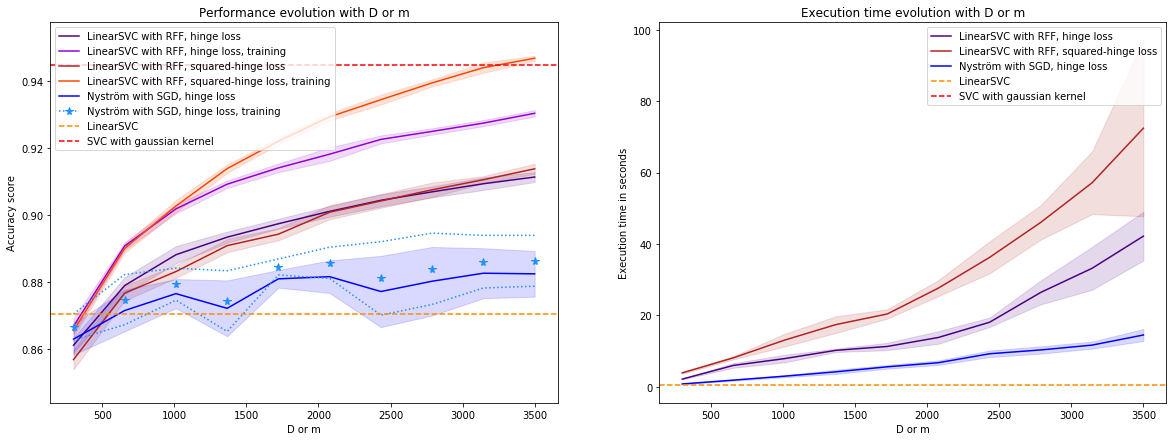

In [41]:
fig = plt.figure(figsize=(20,7)) 

# ax1.plot of the performance

ax1 = plt.subplot(1,2,1)

y_max = max(max(np.mean(scores_rff_h_d, axis=1) + np.std(scores_rff_h_d, axis=1)),
            max(np.mean(scores_train_rff_h_d, axis=1) + np.std(scores_train_rff_h_d, axis=1)),
            max(np.mean(scores_rff, axis=1) + np.std(scores_rff, axis=1)),
            max(np.mean(scores_train_rff, axis=1) + np.std(scores_train_rff, axis=1)),
            max(np.mean(scores_nys, axis=1) + np.std(scores_nys, axis=1)),
            max(np.mean(scores_train_nys, axis=1) + np.std(scores_train_nys, axis=1)),
            float(max(scores_lin_h_l2)),float(max(scores_lin_sh_l1)),float(max(scores_lin_sh_l2)), score_gauss)+0.01
y_min = min(min(np.mean(scores_rff_h_d, axis=1) - np.std(scores_rff_h_d, axis=1)),
            min(np.mean(scores_train_rff_h_d, axis=1) - np.std(scores_train_rff_h_d, axis=1)),
            min(np.mean(scores_rff, axis=1) - np.std(scores_rff, axis=1)),
            min(np.mean(scores_train_rff, axis=1) - np.std(scores_train_rff, axis=1)),
            min(np.mean(scores_nys, axis=1) - np.std(scores_nys, axis=1)),
            min(np.mean(scores_train_nys, axis=1) - np.std(scores_train_nys, axis=1)),
            float(min(scores_lin_h_l2)),float(max(scores_lin_sh_l1)),float(max(scores_lin_sh_l2)), score_gauss)-0.01

ax1.set_ylim(y_min, y_max)

ax1.plot(list_D, np.mean(scores_rff_h_d, axis=1), '-', color='indigo', label='LinearSVC with RFF, hinge loss')
ax1.fill_between(list_D, np.mean(scores_rff_h_d, axis=1) - np.std(scores_rff_h_d, axis=1),
                 np.mean(scores_rff_h_d, axis=1) + np.std(scores_rff_h_d, axis=1), 
                 color='indigo', alpha=0.15)

ax1.plot(list_D, np.mean(scores_train_rff_h_d, axis=1), '-', color='darkviolet', label='LinearSVC with RFF, hinge loss, training')
ax1.fill_between(list_D, np.mean(scores_train_rff_h_d, axis=1) - np.std(scores_train_rff_h_d, axis=1),
                 np.mean(scores_train_rff_h_d, axis=1) + np.std(scores_train_rff_h_d, axis=1), 
                 color='darkviolet', alpha=0.15)

ax1.plot(list_D, np.mean(scores_rff, axis=1), '-', color='firebrick', label='LinearSVC with RFF, squared-hinge loss')
ax1.fill_between(list_D, np.mean(scores_rff, axis=1) - np.std(scores_rff, axis=1),
                 np.mean(scores_rff, axis=1) + np.std(scores_rff, axis=1), 
                 color='firebrick', alpha=0.15)

ax1.plot(list_D, np.mean(scores_train_rff, axis=1), '-', color='orangered', label='LinearSVC with RFF, squared-hinge loss, training')
ax1.fill_between(list_D, np.mean(scores_train_rff, axis=1) - np.std(scores_train_rff, axis=1),
                 np.mean(scores_train_rff, axis=1) + np.std(scores_train_rff, axis=1), 
                 color='orangered', alpha=0.15)

ax1.plot(list_D, np.mean(scores_nys, axis=1), '-', color='blue', label='Nyström with SGD, hinge loss')
ax1.fill_between(list_D, np.mean(scores_nys, axis=1) - np.std(scores_nys, axis=1),
                 np.mean(scores_nys, axis=1) + np.std(scores_nys, axis=1), 
                 color='blue', alpha=0.15)

ax1.plot(list_D, np.mean(scores_train_nys, axis=1), '*', markersize=8, color='dodgerblue',label='Nyström with SGD, hinge loss, training')
ax1.plot(list_D, np.mean(scores_train_nys, axis=1) - np.std(scores_train_nys, axis=1), ':',color='dodgerblue')
ax1.plot(list_D, np.mean(scores_train_nys, axis=1) + np.std(scores_train_nys, axis=1), ':',color='dodgerblue')


ax1.axhline(y=score_lin, color='darkorange', linestyle='--', label='LinearSVC')
ax1.axhline(y=score_gauss, color='r', linestyle='--', label='SVC with gaussian kernel')

ax1.set_title("Performance evolution with D or m")
ax1.set_xlabel("D or m")
ax1.set_ylabel("Accuracy score")

handles, labels = ax1.get_legend_handles_labels()
handles = [copy.copy(ha) for ha in handles ]
handles[5].set_linestyle(':')
ax1.legend(loc='upper left', handles=handles, labels=labels)

# ax1.plot of the execution time

ax2 = plt.subplot(1,2,2)

y_max = max(max(np.mean(times_rff_h_d, axis=1) + np.std(times_rff_h_d, axis=1)),
            max(np.mean(times_rff, axis=1) + np.std(times_rff, axis=1)),
            max(np.mean(times_nys, axis=1) + np.std(times_nys, axis=1)),
            float(time_lin))+5
y_min = min(min(np.mean(times_rff_h_d, axis=1) - np.std(times_rff_h_d, axis=1)),
            min(np.mean(times_rff, axis=1) - np.std(times_rff, axis=1)),
            min(np.mean(times_nys, axis=1) - np.std(times_nys, axis=1)),
            float(time_lin))-5

ax2.set_ylim(y_min, y_max)

ax2.plot(list_D, np.mean(times_rff_h_d, axis=1), '-', color='indigo', label='LinearSVC with RFF, hinge loss')
ax2.fill_between(list_D, np.mean(times_rff_h_d, axis=1) - np.std(times_rff_h_d, axis=1),
                 np.mean(times_rff_h_d, axis=1) + np.std(times_rff_h_d, axis=1), 
                 color='indigo', alpha=0.15)

ax2.plot(list_D, np.mean(times_rff, axis=1), '-', color='firebrick', label='LinearSVC with RFF, squared-hinge loss')
ax2.fill_between(list_D, np.mean(times_rff, axis=1) - np.std(times_rff, axis=1),
                 np.mean(times_rff, axis=1) + np.std(times_rff, axis=1), 
                 color='firebrick', alpha=0.15)

ax2.plot(list_D, np.mean(times_nys, axis=1), '-', color='blue', label='Nyström with SGD, hinge loss')
ax2.fill_between(list_D, np.mean(times_nys, axis=1) - np.std(times_nys, axis=1),
                 np.mean(times_nys, axis=1) + np.std(times_nys, axis=1), 
                 color='blue', alpha=0.15)

ax2.axhline(y=time_lin, color='darkorange', linestyle='--', label='LinearSVC')
ax2.axhline(y=time_gauss, color='r', linestyle='--', label='SVC with gaussian kernel')

ax2.set_title("Execution time evolution with D or m")
ax2.set_xlabel("D or m")
ax2.set_ylabel("Execution time in seconds")

ax2.legend(loc='upper right')

plt.savefig("synthetic_clf_results/plots/Dm_influence.png")
plt.show()